In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

def load_data(filename):
    """
    Funzione per il parsing di una serie intraday 
    con estensione txt esportata da Tradestation
    """
    data = pd.read_csv(filename, 
                       usecols=['Date','Time','Open','High','Low','Close','Up','Down'], 
                       parse_dates=[['Date', 'Time']], )
    data.columns = ["date_time","open","high","low","close","up","down"]
    data.set_index('date_time', inplace = True)
    data['volume'] = data['up'] + data['down']
    data.drop(['up','down'], axis=1, inplace=True)
    return data

startDate = "20070101"
endDate = "20191111"
filename = "@NG_60min_Exchange.txt"
dataset = load_data(filename)
startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))
dataset = dataset.loc[startDateParsed:endDateParsed]
dataset["hour"] = dataset.index.hour
dataset['DOM'] = dataset.index.day
dataset['DOW'] = dataset.index.dayofweek
dataset['Week'] = dataset.index.week
dataset['Month'] = dataset.index.month
dataset['DeltaClosePerc'] = round((dataset.close - dataset.close.shift(1)) / dataset.close.shift(1) * 100,2)
dataset['CloseOpenPerc'] = round((dataset.close - dataset.open) / dataset.open * 100,2)
dataset.tail(23)

,open,high,low,close,volume,hour,DOM,DOW,Week,Month,DeltaClosePerc,CloseOpenPerc
date_time,,,,,,,,,,,,
2019-11-08 01:00:00,2.763,2.803,2.755,2.781,2967,1,8,4,45,11,0.65,0.65
2019-11-08 02:00:00,2.783,2.785,2.769,2.770,729,2,8,4,45,11,-0.40,-0.47
2019-11-08 03:00:00,2.770,2.800,2.769,2.788,2044,3,8,4,45,11,0.65,0.65
2019-11-08 04:00:00,2.787,2.791,2.777,2.790,884,4,8,4,45,11,0.07,0.11
2019-11-08 05:00:00,2.790,2.795,2.788,2.793,737,5,8,4,45,11,0.11,0.11
2019-11-08 06:00:00,2.792,2.801,2.786,2.800,901,6,8,4,45,11,0.25,0.29
2019-11-08 07:00:00,2.800,2.822,2.798,2.809,3864,7,8,4,45,11,0.32,0.32
2019-11-08 08:00:00,2.808,2.814,2.792,2.799,2710,8,8,4,45,11,-0.36,-0.32
2019-11-08 09:00:00,2.799,2.817,2.793,2.805,7255,9,8,4,45,11,0.21,0.21


In [2]:
dataset[-23:].iplot(kind='candle',theme='white',
                        up_color='green', down_color='red',
                        title = "Gold Continuous Futures [GC]", xTitle = "Tempo", yTitle = "Prezzo")

In [3]:
daily = dataset.iloc[:,6:].resample('D').mean()
daily['DailyCloseOpenPerc'] = dataset.resample('D')['CloseOpenPerc'].sum()
daily['DailyDeltaClosePerc'] = dataset.resample('D')['DeltaClosePerc'].sum()
daily.tail(10)

,DOM,DOW,Week,Month,DeltaClosePerc,CloseOpenPerc,DailyCloseOpenPerc,DailyDeltaClosePerc
date_time,,,,,,,,
2019-11-02,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2019-11-03,3.0,6.0,44.0,11.0,0.698000,-0.016000,-0.08,3.49
2019-11-04,4.0,0.0,45.0,11.0,0.070000,0.071739,1.65,1.61
2019-11-05,5.0,1.0,45.0,11.0,0.042174,0.039565,0.91,0.97
2019-11-06,6.0,2.0,45.0,11.0,-0.053478,-0.038696,-0.89,-1.23
2019-11-07,7.0,3.0,45.0,11.0,-0.076957,-0.081739,-1.88,-1.77
2019-11-08,8.0,4.0,45.0,11.0,0.018889,0.022778,0.41,0.34
2019-11-09,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2019-11-10,10.0,6.0,45.0,11.0,-0.560000,-0.040000,-0.20,-2.80


In [4]:
daily['DailyCloseOpenPerc'].describe(percentiles = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90])

count    4698.000000
mean       -0.023531
std         1.345506
min       -13.050000
10%        -1.523000
20%        -0.850000
30%        -0.410000
40%        -0.100000
50%         0.000000
60%         0.040000
70%         0.330000
80%         0.756000
90%         1.440000
max        15.410000
Name: DailyCloseOpenPerc, dtype: float64

In [5]:
daily['DailyDeltaClosePerc'].describe(percentiles = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90])

count    4698.00000
mean       -0.03073
std         1.39322
min       -12.36000
10%        -1.57000
20%        -0.92000
30%        -0.50000
40%        -0.14000
50%         0.00000
60%         0.02000
70%         0.40000
80%         0.84000
90%         1.51000
max        15.12000
Name: DailyDeltaClosePerc, dtype: float64

In [6]:
dow = {"Monday": 0, "Tuesday":1, "Wednesday":2, "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6}

biasWeeklyIntraday = []
biasWeeklyOverNight = []

for dkey, dvalue in dow.items():
    biasWeeklyIntraday.append(daily[(daily['DOW'] == dvalue)]['DailyCloseOpenPerc'].mean())
    biasWeeklyOverNight.append(daily[(daily['DOW'] == dvalue)]['DailyDeltaClosePerc'].mean())

print("")
print("Intraday:")
print(len(biasWeeklyIntraday))
print(biasWeeklyIntraday)
print("")
print("OverNight:")
print(len(biasWeeklyOverNight))
print(biasWeeklyOverNight)


Intraday:
7
[-0.03450074515648288, 0.04406855439642325, -0.008956780923994035, -0.19453055141579728, -0.004248466257668714, nan, 0.03389984825493172]

OverNight:
7
[-0.015797317436661715, 0.0479284649776453, -0.003204172876304035, -0.20281669150521614, -0.01684049079754602, nan, -0.02535660091047041]


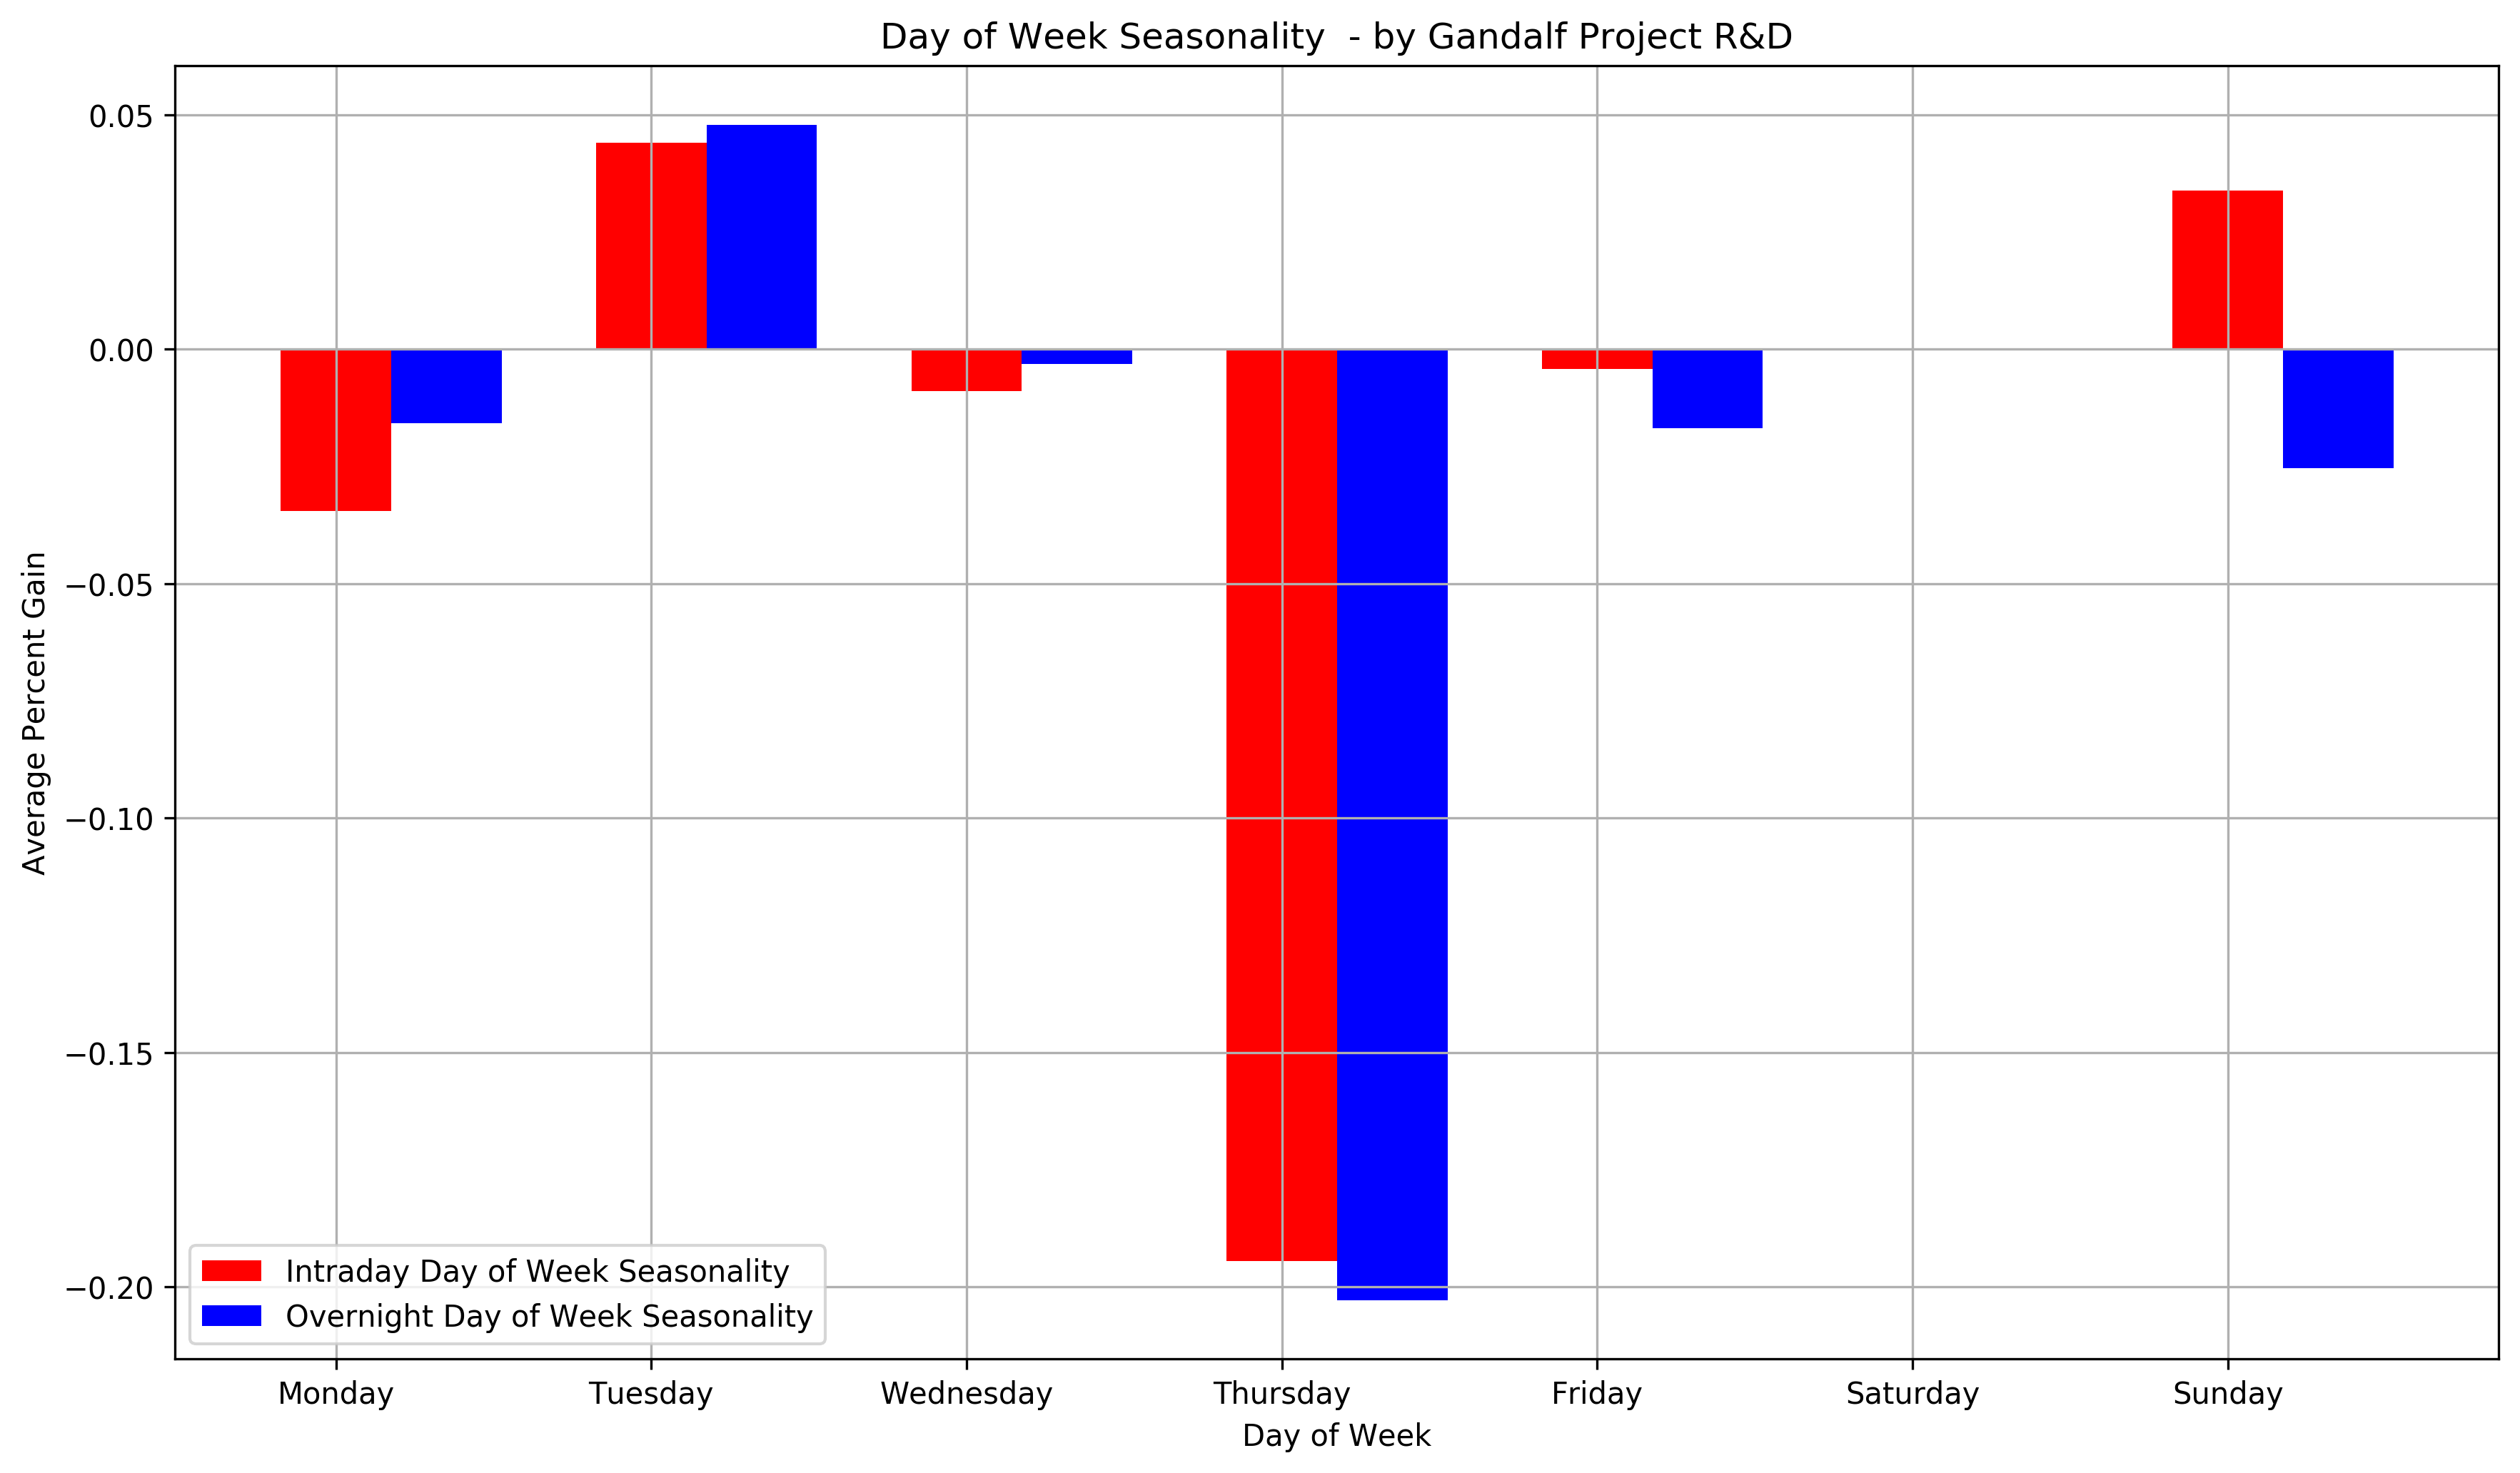

In [7]:
# ************** MODULO GRAFICO ************************************
n_groups = 7

fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

rects1 = ax.bar(index, 
                biasWeeklyIntraday, 
                bar_width, 
                alpha=opacity, 
                color='red', 
                label='Intraday Day of Week Seasonality')

rects1 = ax.bar(index + bar_width, 
                biasWeeklyOverNight, 
                bar_width, 
                alpha=opacity, 
                color='blue', 
                label='Overnight Day of Week Seasonality')

ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Percent Gain')
ax.set_title('Day of Week Seasonality ' + ' - by Gandalf Project R&D')
ax.set_xticks(index)
ax.set_xticklabels((["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]))
ax.legend()
ax.grid(True)
plt.show()
# ************** MODULO GRAFICO ************************************

# Percentuale occorrenze positive e negative

In [8]:
def percPosNeg(array, soglia):
    """
    Funzione che restituisce le percentuali di valori 
    maggiori e minori di una soglia
    """
    if len(array) == 0:
        return 0,0
    contapos = 0
    contaneg = 0
    for el in array:
        if el > soglia:
            contapos+=1
        if el <= soglia:
            contaneg+=1
    return round(contapos/len(array)*100,2), round(contaneg/len(array)*100,2)

In [9]:
dow = {"Monday": 0, "Tuesday":1, "Wednesday":2, "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6}

DayOfWeek_Intraday_Statistics = []
DayOfWeek_OverNight_Statistics = []

daysofweek_names = list(dow.keys())

for dkey, dvalue in dow.items():

    intraday = daily[(daily['DOW'] == dvalue)]['DailyCloseOpenPerc'].dropna()
    DayOfWeek_Intraday_Statistics.append(percPosNeg(intraday,0))
    
    overnight = daily[(daily['DOW'] == dvalue)]['DailyDeltaClosePerc'].dropna()
    DayOfWeek_OverNight_Statistics.append(percPosNeg(overnight,0))

print("Statistics Intraday:")
for el in range(len(DayOfWeek_Intraday_Statistics)):
    if biasWeeklyIntraday[el] > 0:
        print(daysofweek_names[el], round(biasWeeklyIntraday[el],4), DayOfWeek_Intraday_Statistics[el][0], "%")
    if biasWeeklyIntraday[el] <= 0:
        print(daysofweek_names[el], round(biasWeeklyIntraday[el],4), DayOfWeek_Intraday_Statistics[el][1], "%")
        
print("")
print("Statistics Overnight:")
for el in range(len(DayOfWeek_OverNight_Statistics)):
    if biasWeeklyOverNight[el] > 0:
        print(daysofweek_names[el], round(biasWeeklyOverNight[el],4), DayOfWeek_OverNight_Statistics[el][0], "%")
    if biasWeeklyOverNight[el] <= 0:
        print(daysofweek_names[el], round(biasWeeklyOverNight[el],4), DayOfWeek_OverNight_Statistics[el][1], "%")

Statistics Intraday:
Monday -0.0345 50.67 %
Tuesday 0.0441 51.42 %
Wednesday -0.009 53.5 %
Thursday -0.1945 55.44 %
Friday -0.0042 52.76 %
Sunday 0.0339 52.81 %

Statistics Overnight:
Monday -0.0158 47.54 %
Tuesday 0.0479 51.42 %
Wednesday -0.0032 54.1 %
Thursday -0.2028 55.89 %
Friday -0.0168 52.61 %
Sunday -0.0254 54.63 %


In [10]:
a = daily[(daily["DOW"] == 4)]

a.DailyCloseOpenPerc.iplot(kind='scatter', mode = "markers", color = "blue", theme='white', showlegend = True,
                           title = "Friday Intraday Movements", xTitle = "Price", yTitle = "Occurrencies")

# Statistiche settimanali calcolate per Mese:

In [14]:
dow = {"Monday": 0, "Tuesday":1, "Wednesday":2, "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6}

months = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6,
                "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}

print(dow)
print("")
print(months)

{'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

{'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}


In [15]:
def month_plot(intraday,overnight,month):
    n_groups = 7
    fig, ax = plt.subplots(figsize=(14, 8), dpi=300)
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 1

    rects1 = ax.bar(index, 
                    intraday, 
                    bar_width, 
                    alpha=opacity, 
                    color='red', 
                    label='Intraday Day of Week Seasonality')

    rects1 = ax.bar(index + bar_width, 
                    overnight, 
                    bar_width, 
                    alpha=opacity, 
                    color='blue', 
                    label='Overnight Day of Week Seasonality')

    ax.set_xlabel('Day of Week')
    ax.set_ylabel('Average Percent Gain')
    ax.set_title('Day of Week Seasonality ' + 'on ' + month + ' - by Gandalf Project R&D')
    ax.set_xticks(index)
    ax.set_xticklabels((["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]))
    ax.legend()
    ax.grid(True)
    plt.show()

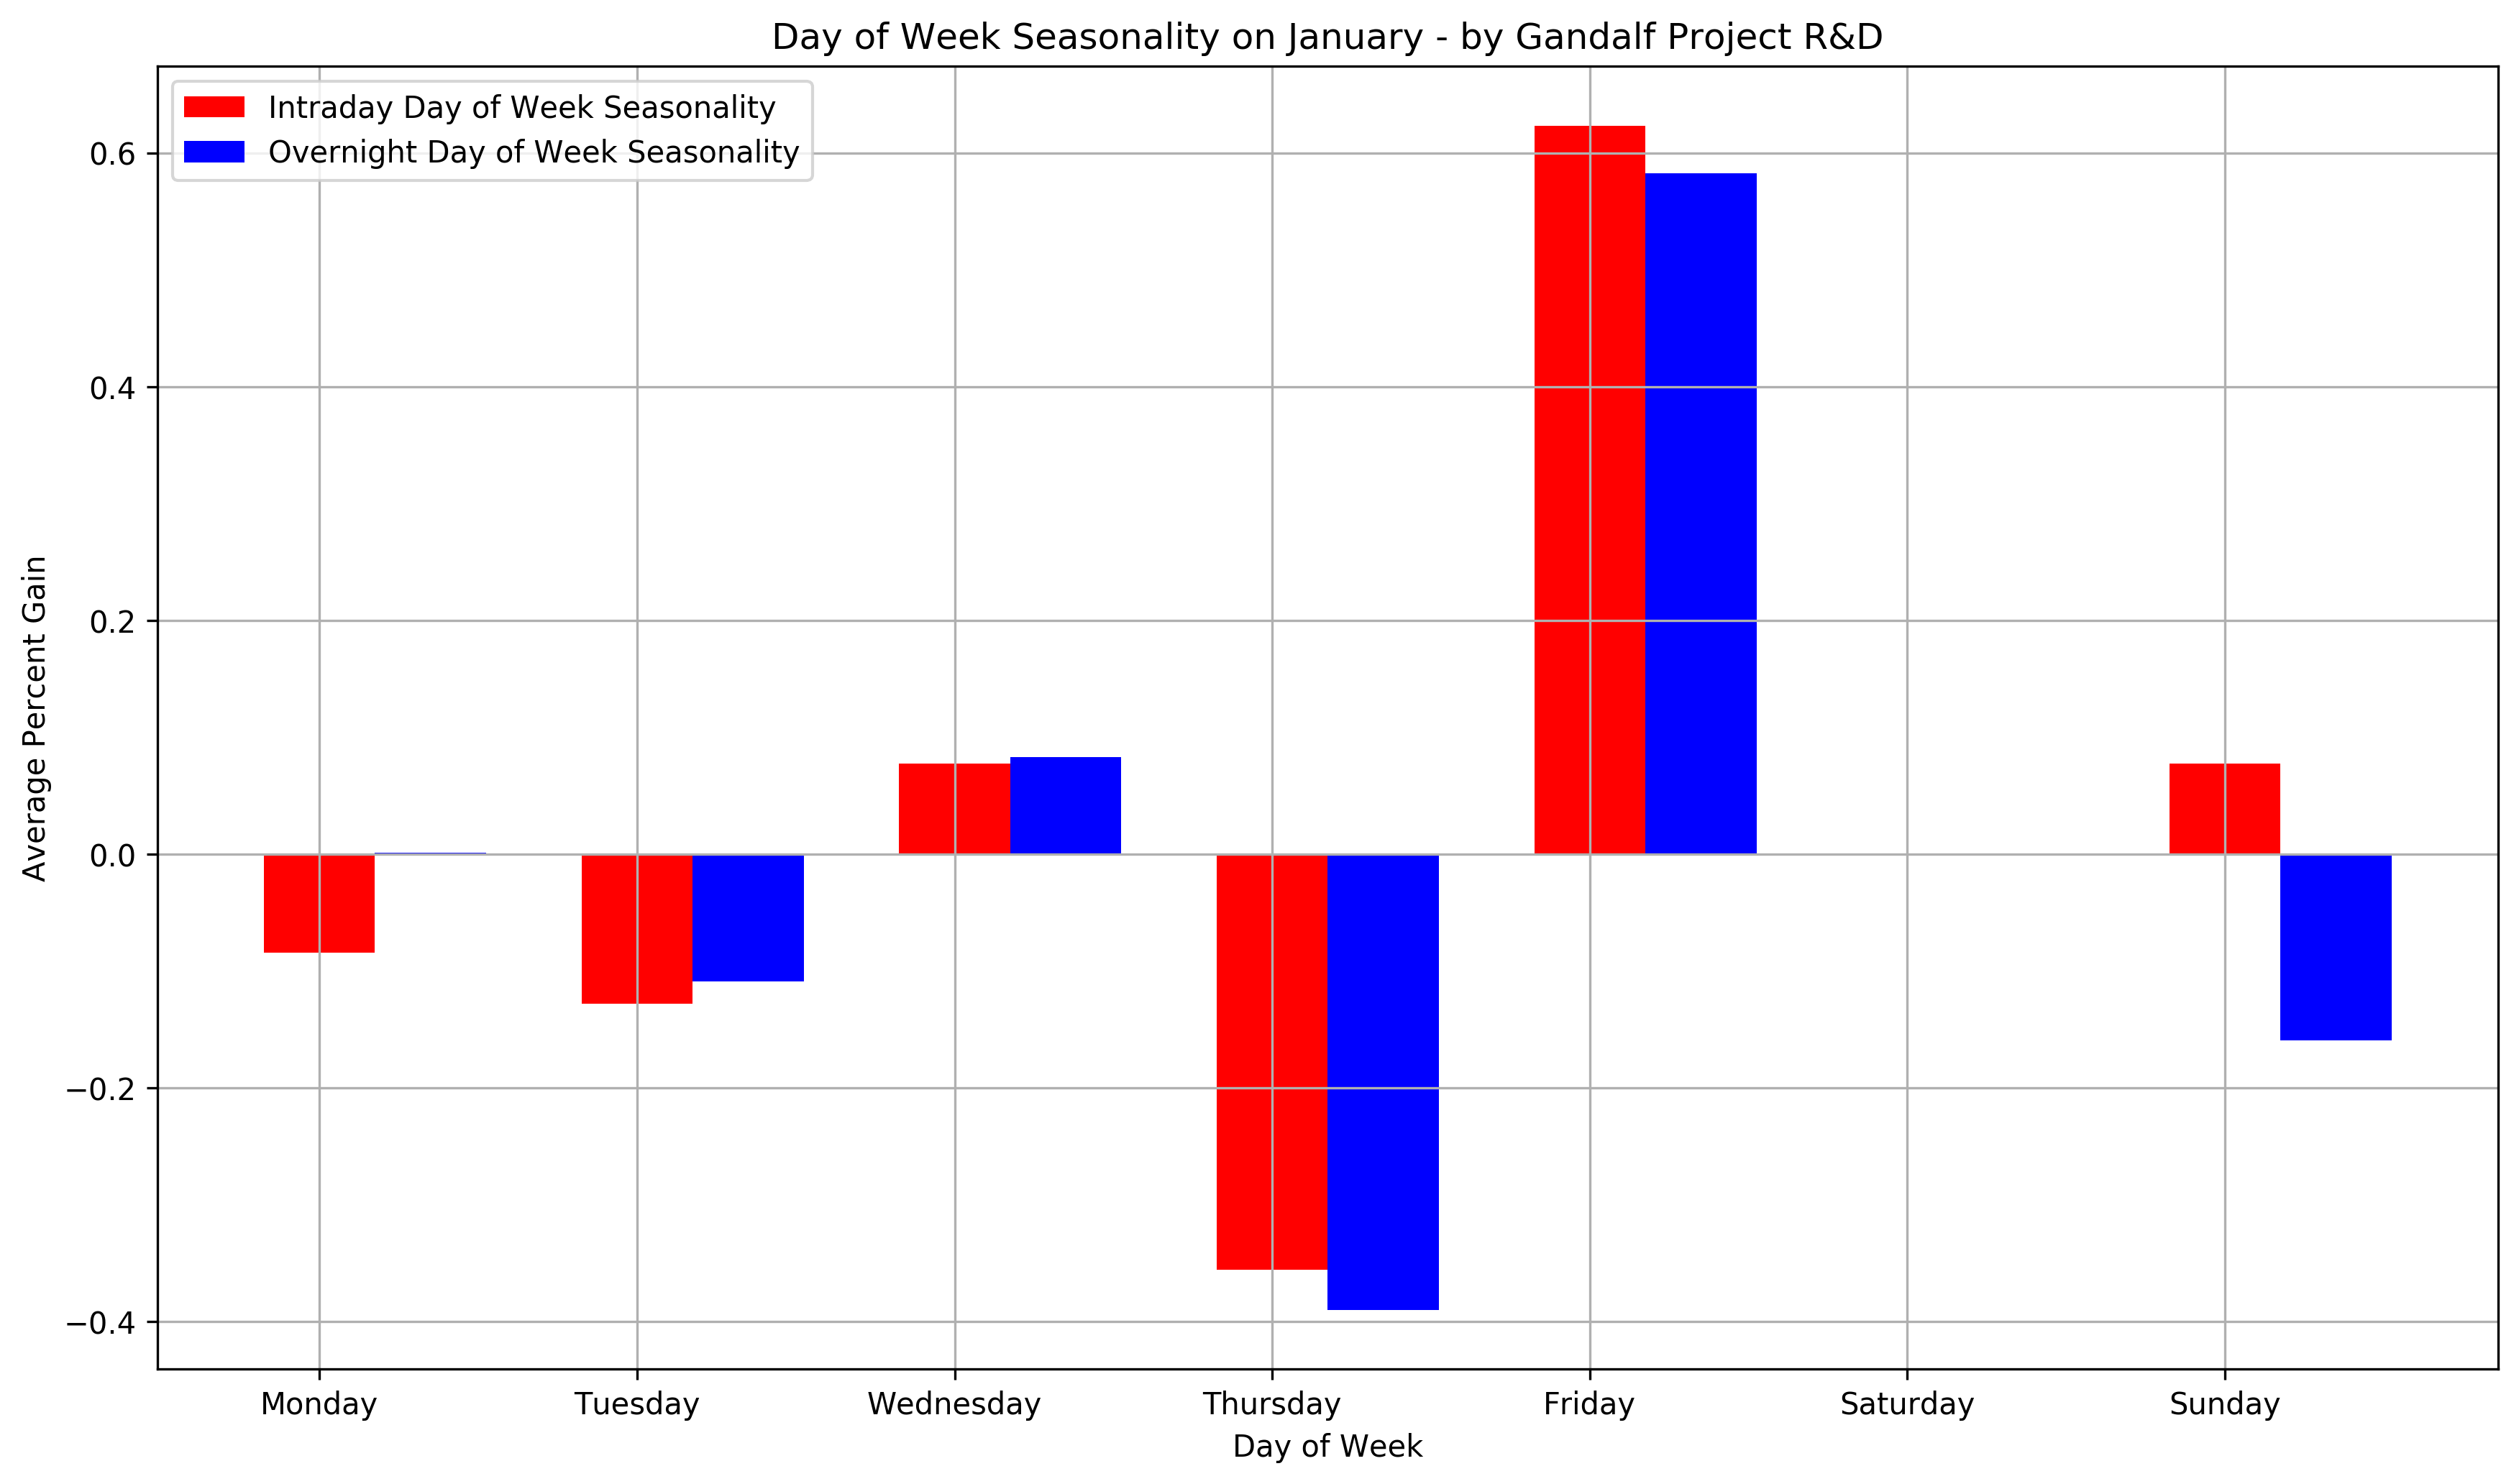

Statistics Intraday:
Monday -0.0846 50.88 %
Tuesday -0.128 57.63 %
Wednesday 0.0778 39.66 %
Thursday -0.3557 63.79 %
Friday 0.6235 60.0 %
Sunday 0.0774 55.56 %

Statistics Overnight:
Monday 0.0009 49.12 %
Tuesday -0.1088 55.93 %
Wednesday 0.0833 37.93 %
Thursday -0.39 60.34 %
Friday 0.5827 61.82 %
Sunday -0.1593 57.41 %



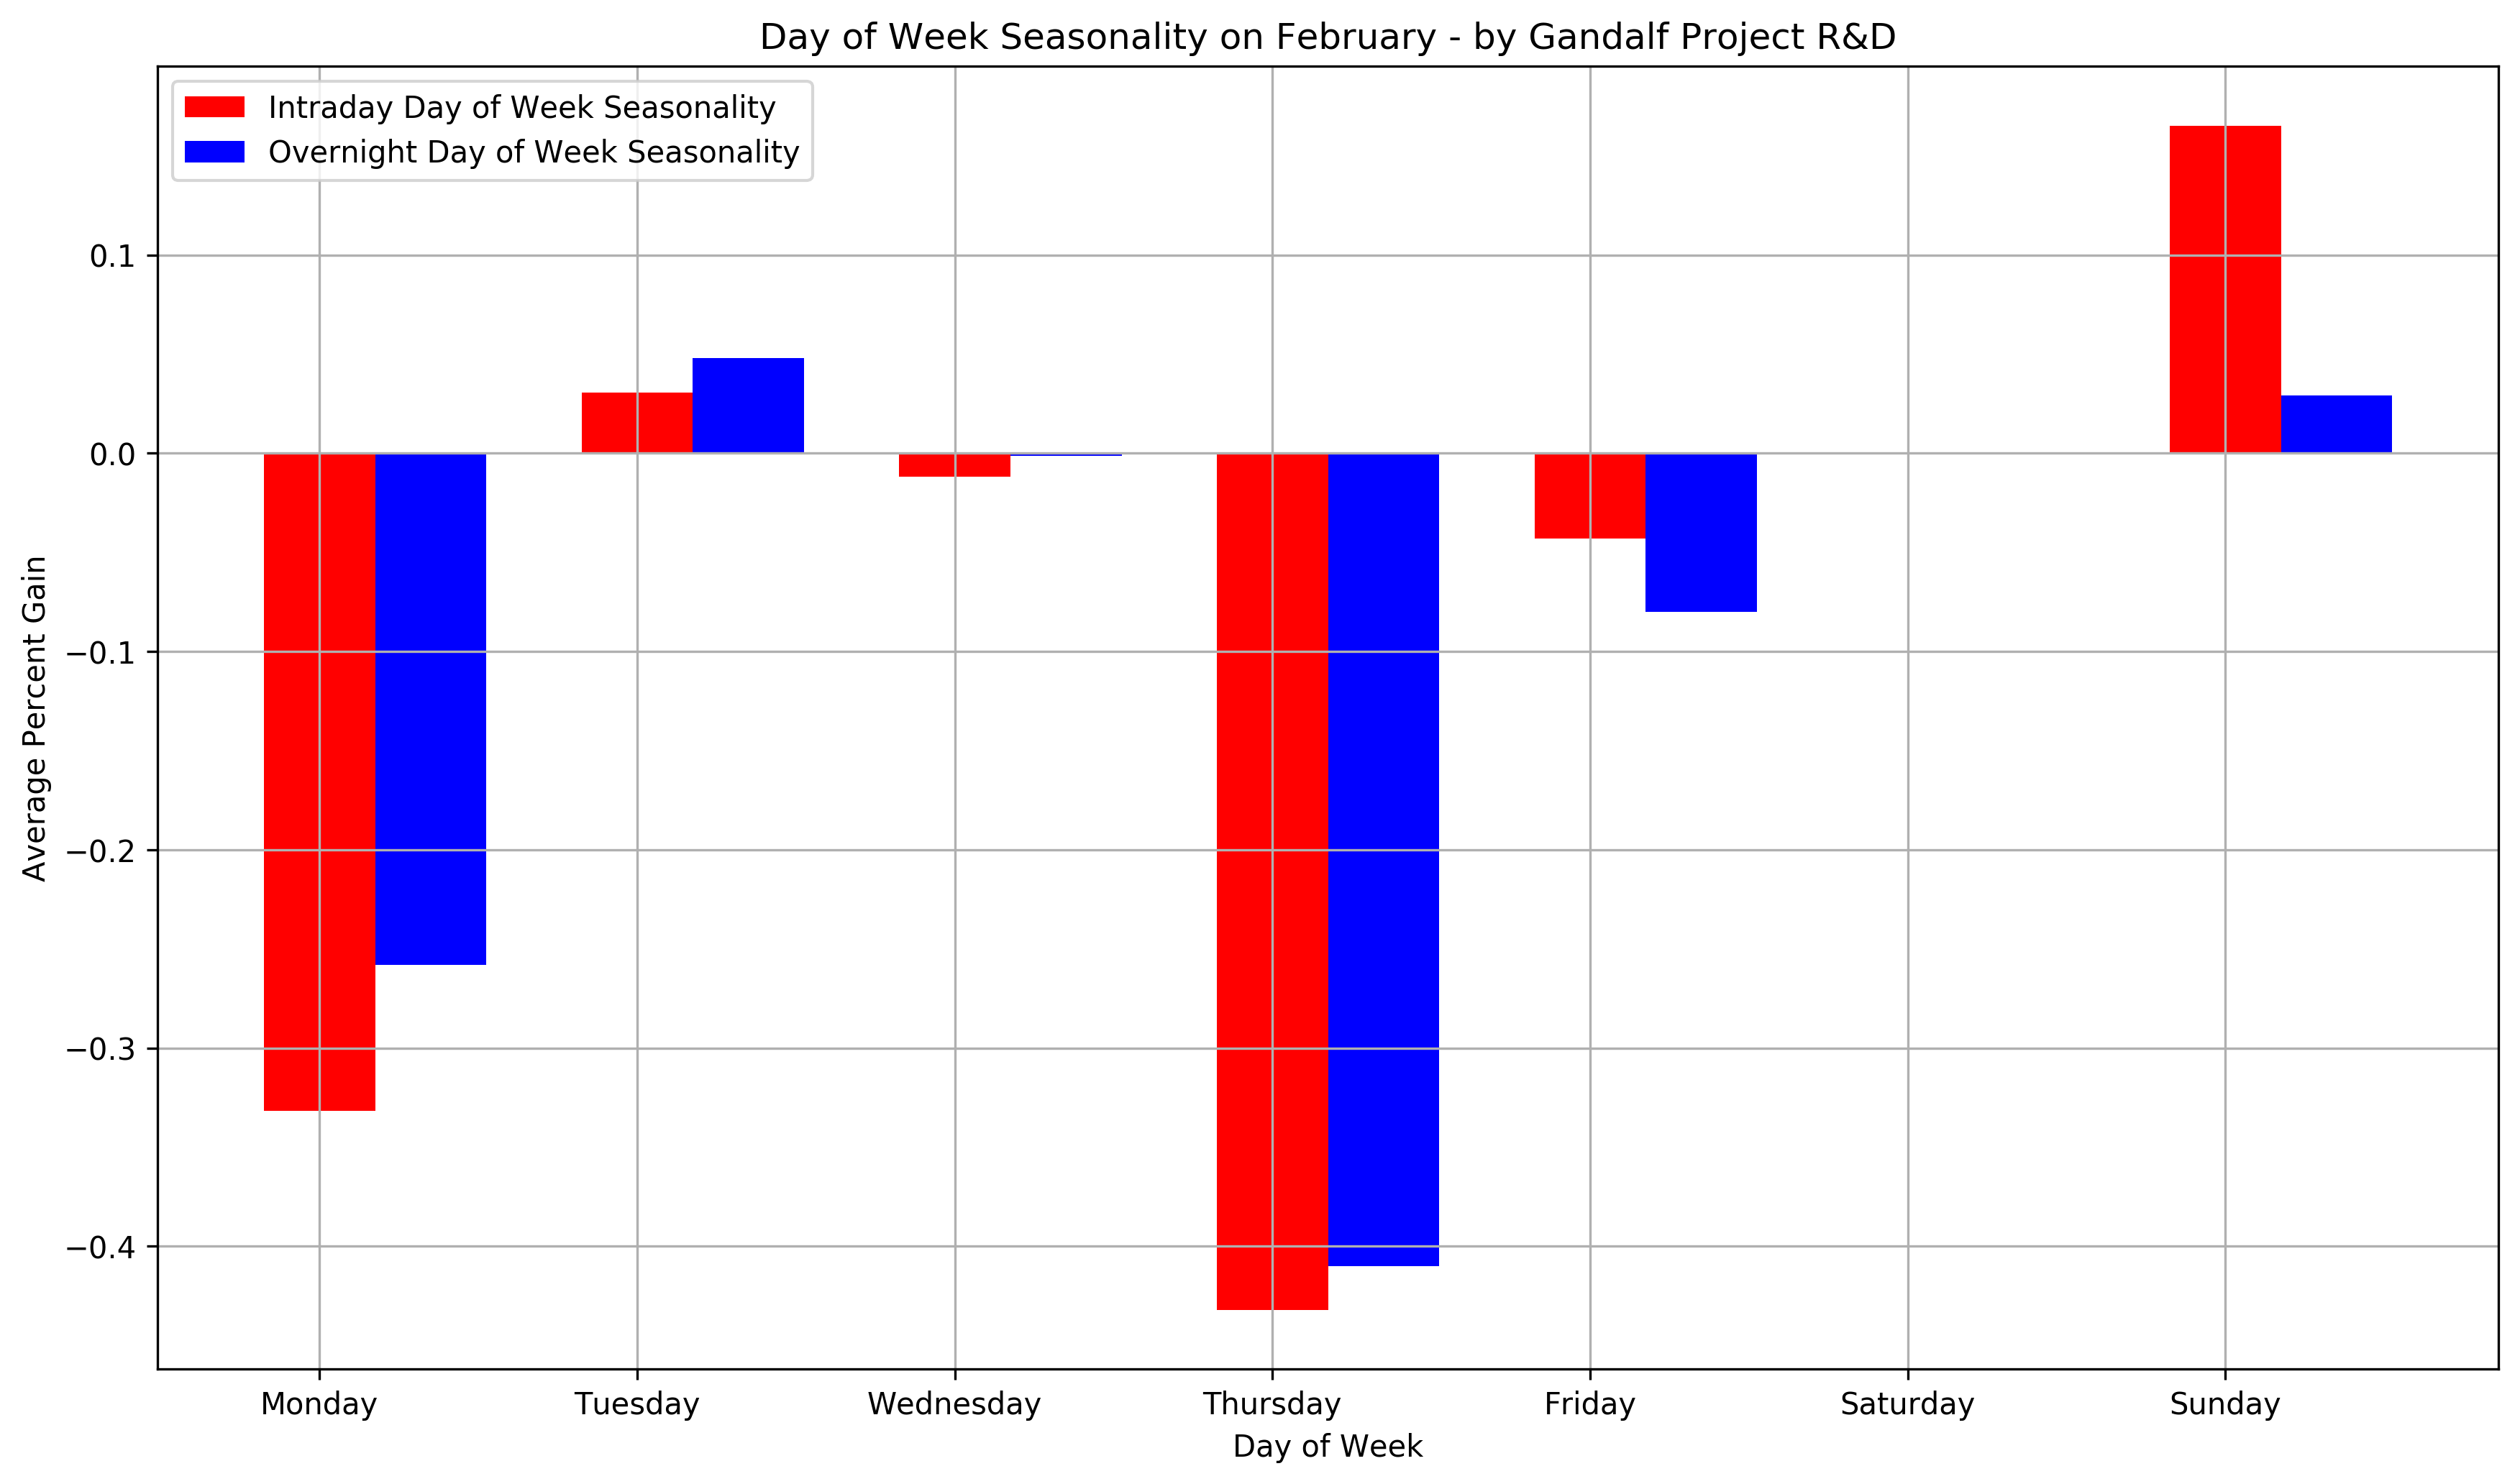

Statistics Intraday:
Monday -0.3317 52.83 %
Tuesday 0.0306 50.0 %
Wednesday -0.0117 49.06 %
Thursday -0.4321 63.46 %
Friday -0.0432 52.83 %
Sunday 0.1653 54.9 %

Statistics Overnight:
Monday -0.2581 45.28 %
Tuesday 0.0481 51.92 %
Wednesday -0.0015 50.94 %
Thursday -0.41 63.46 %
Friday -0.08 54.72 %
Sunday 0.029 47.06 %



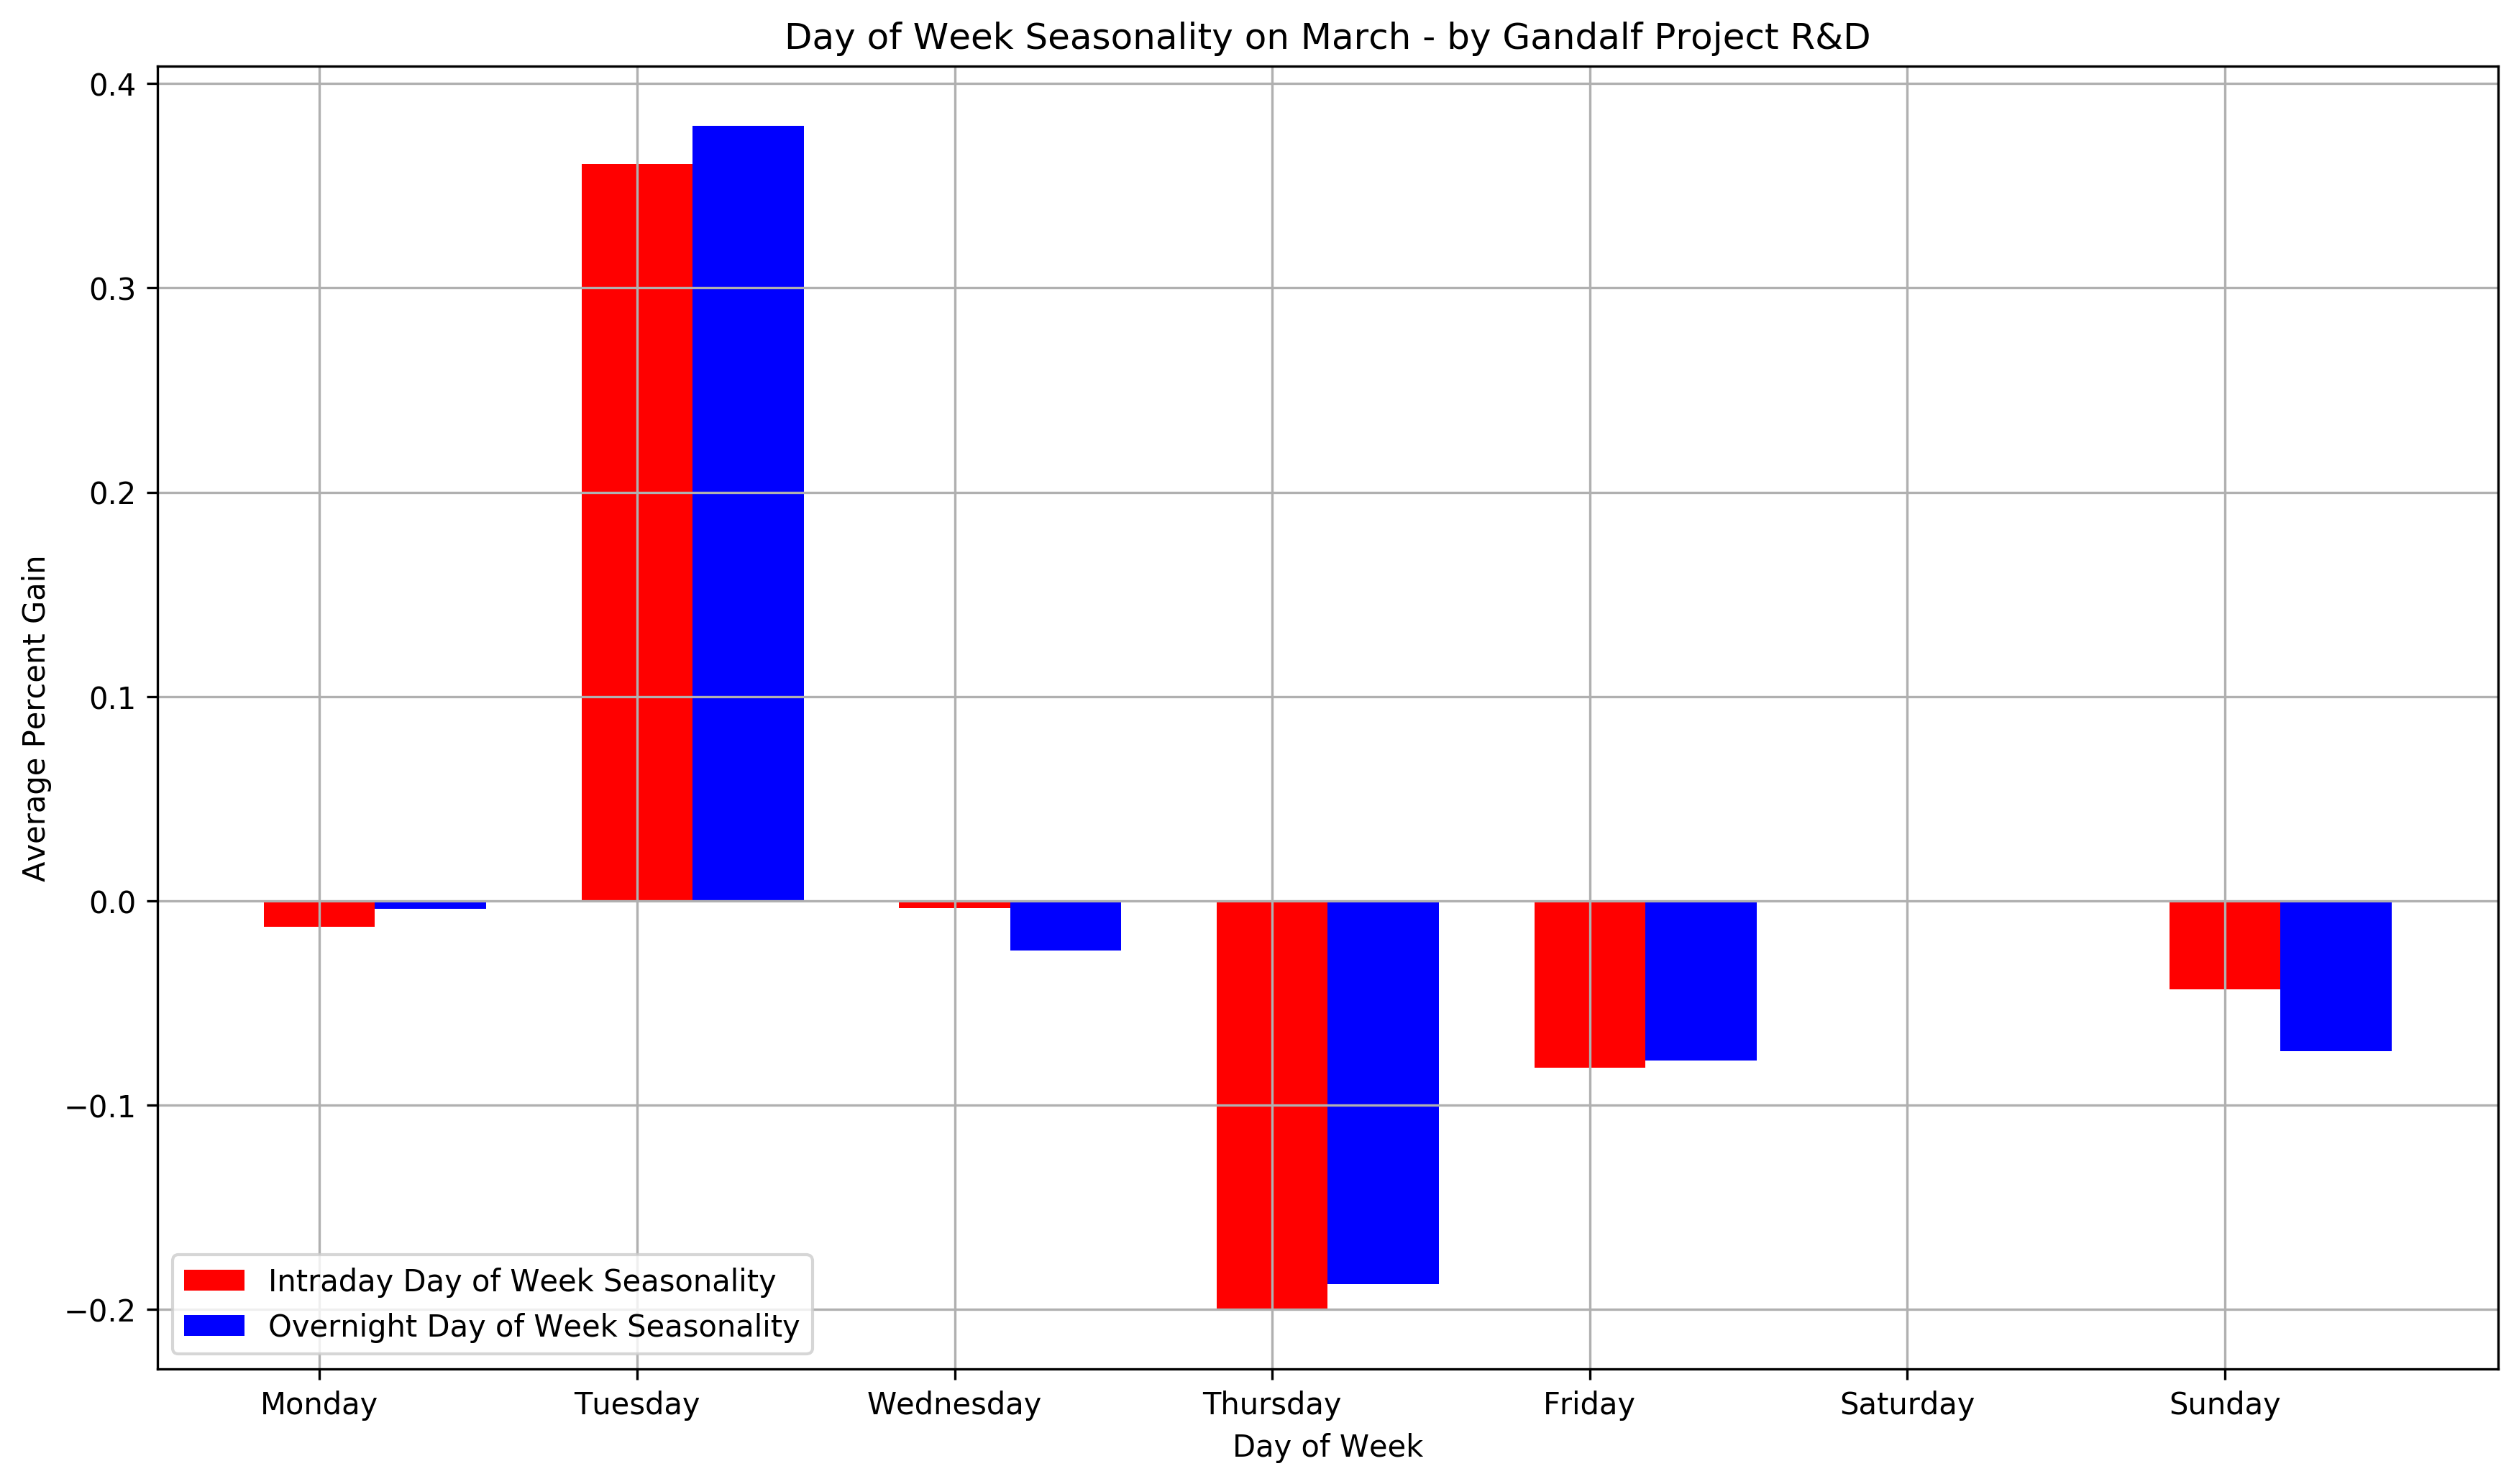

Statistics Intraday:
Monday -0.0128 54.39 %
Tuesday 0.3605 71.93 %
Wednesday -0.0036 50.0 %
Thursday -0.2002 55.17 %
Friday -0.0815 50.0 %
Sunday -0.0434 46.55 %

Statistics Overnight:
Monday -0.0039 52.63 %
Tuesday 0.3795 66.67 %
Wednesday -0.0243 53.57 %
Thursday -0.1874 56.9 %
Friday -0.0781 50.0 %
Sunday -0.0734 60.34 %



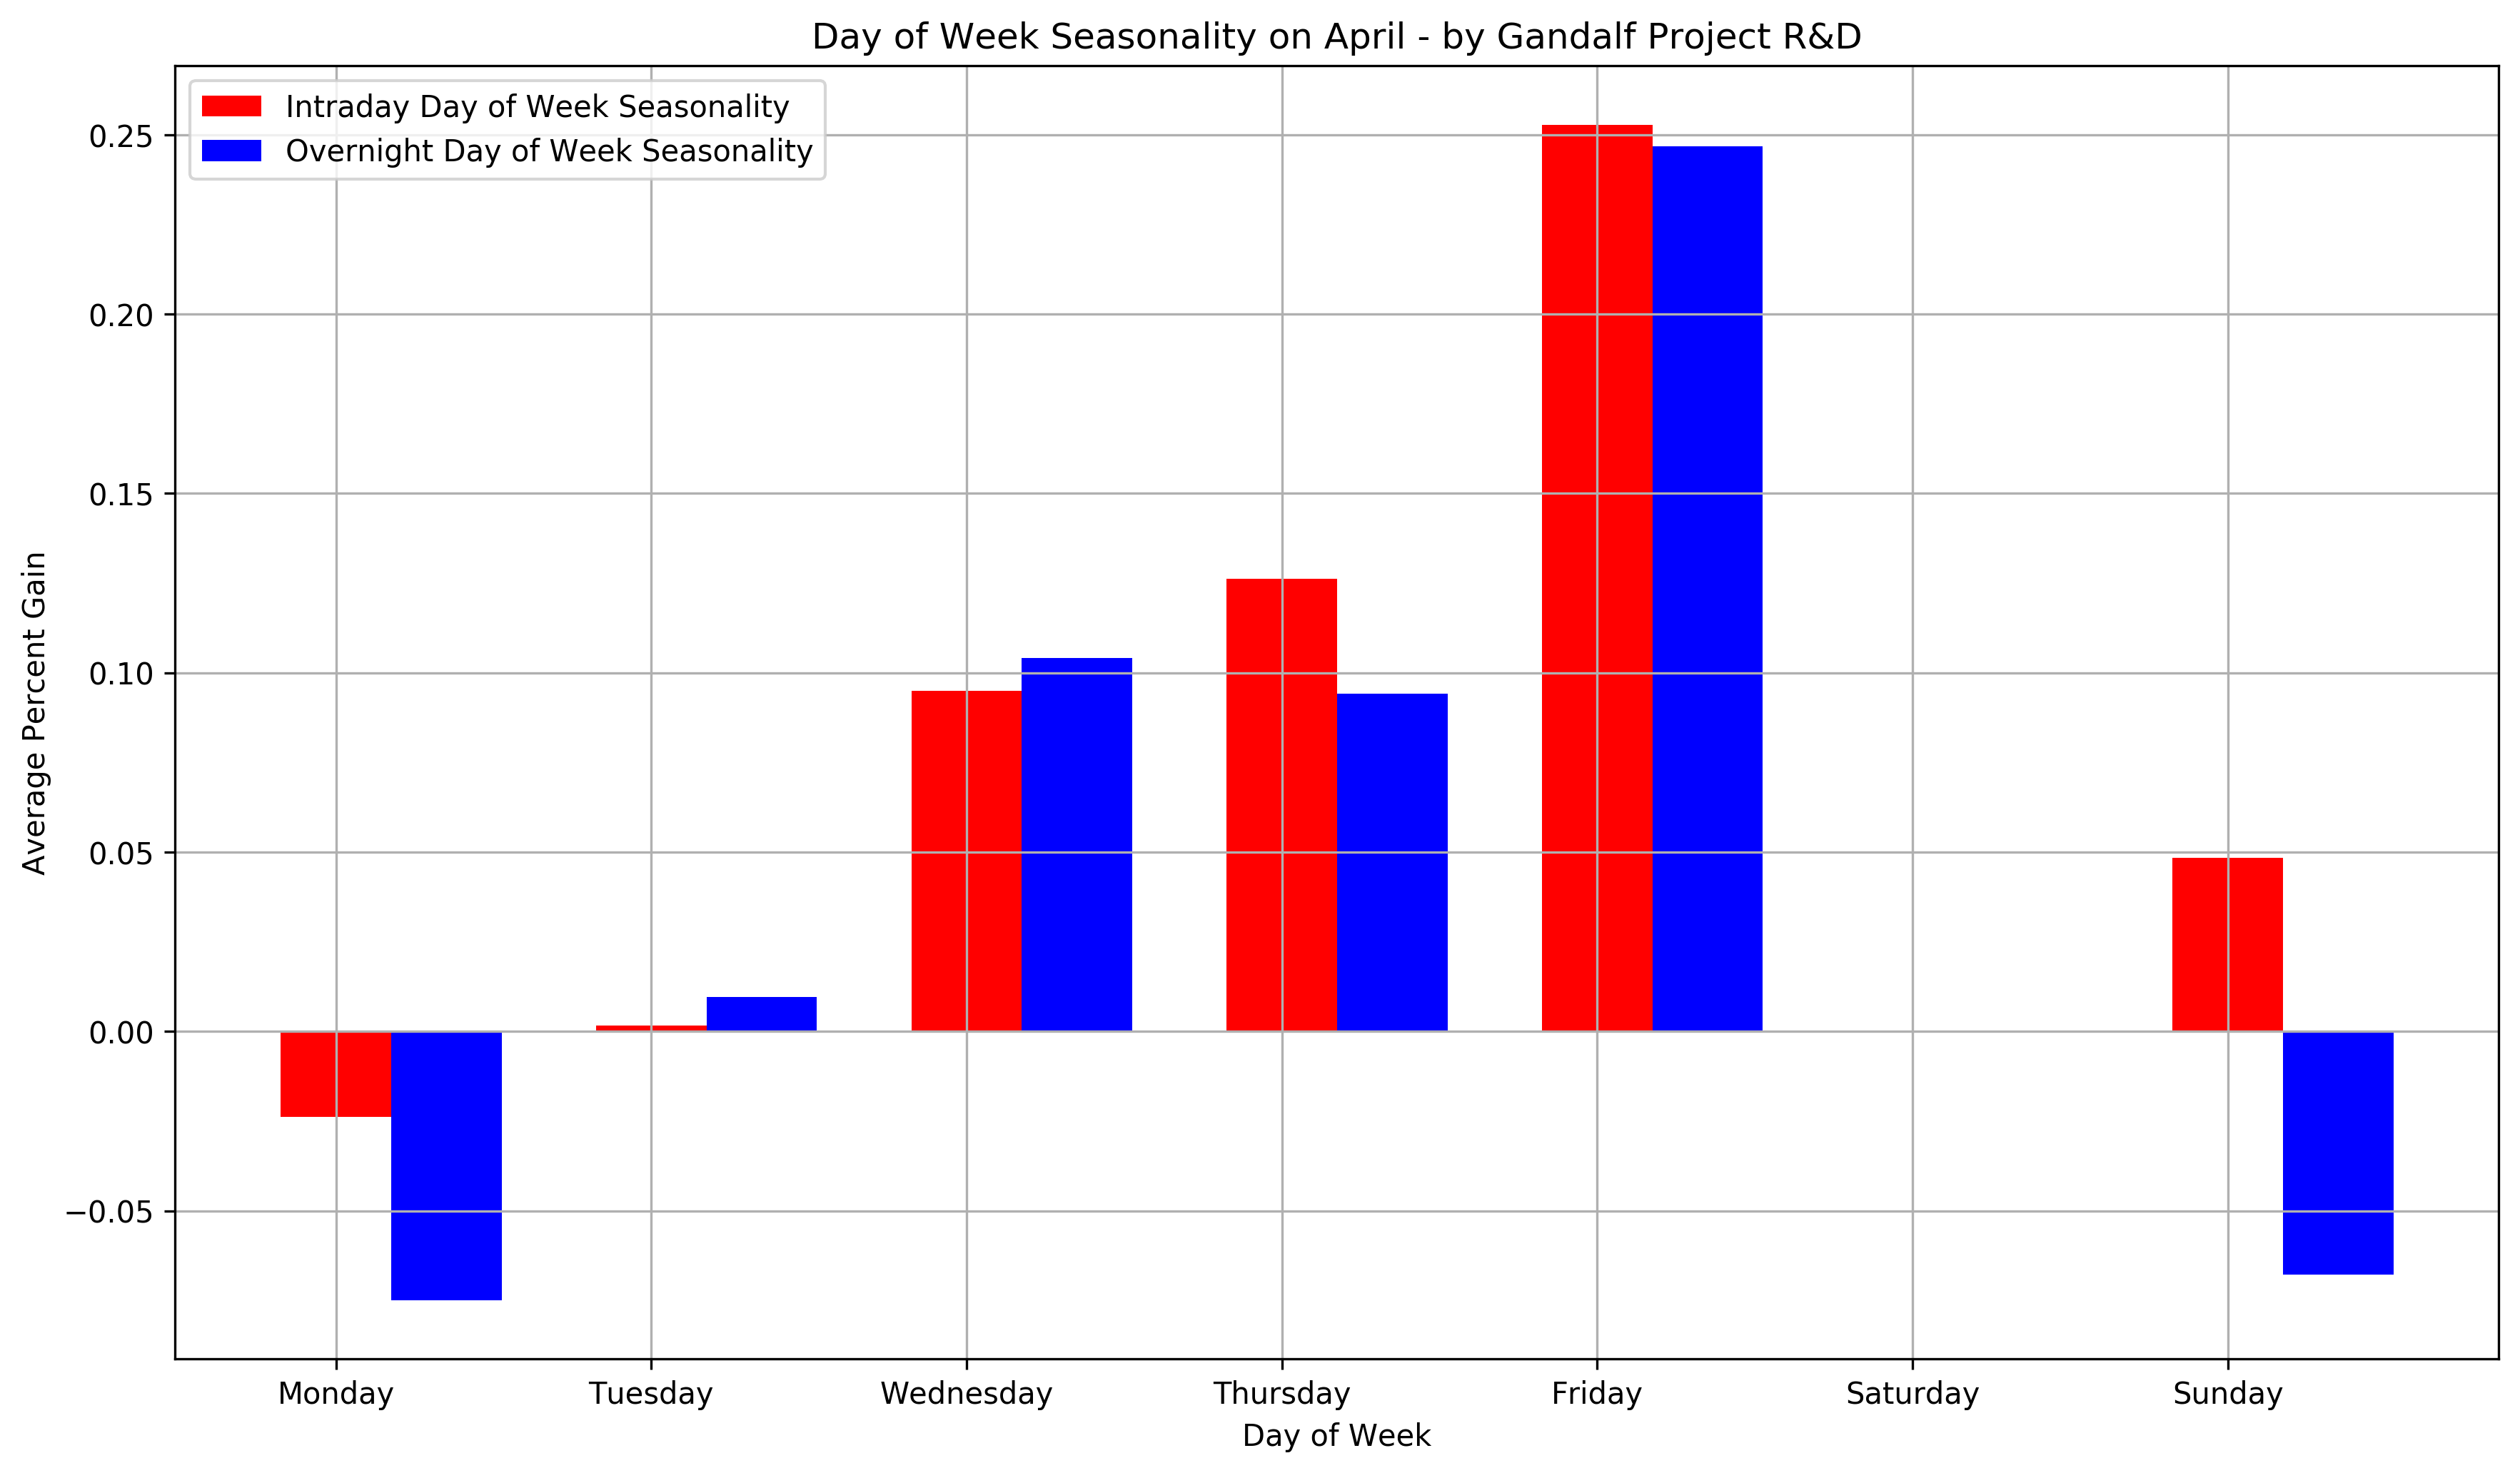

Statistics Intraday:
Monday -0.0239 52.63 %
Tuesday 0.0016 46.43 %
Wednesday 0.095 55.36 %
Thursday 0.1262 47.27 %
Friday 0.2528 52.17 %
Sunday 0.0484 55.36 %

Statistics Overnight:
Monday -0.0749 50.88 %
Tuesday 0.0096 44.64 %
Wednesday 0.1041 50.0 %
Thursday 0.0942 45.45 %
Friday 0.2467 54.35 %
Sunday -0.0679 57.14 %



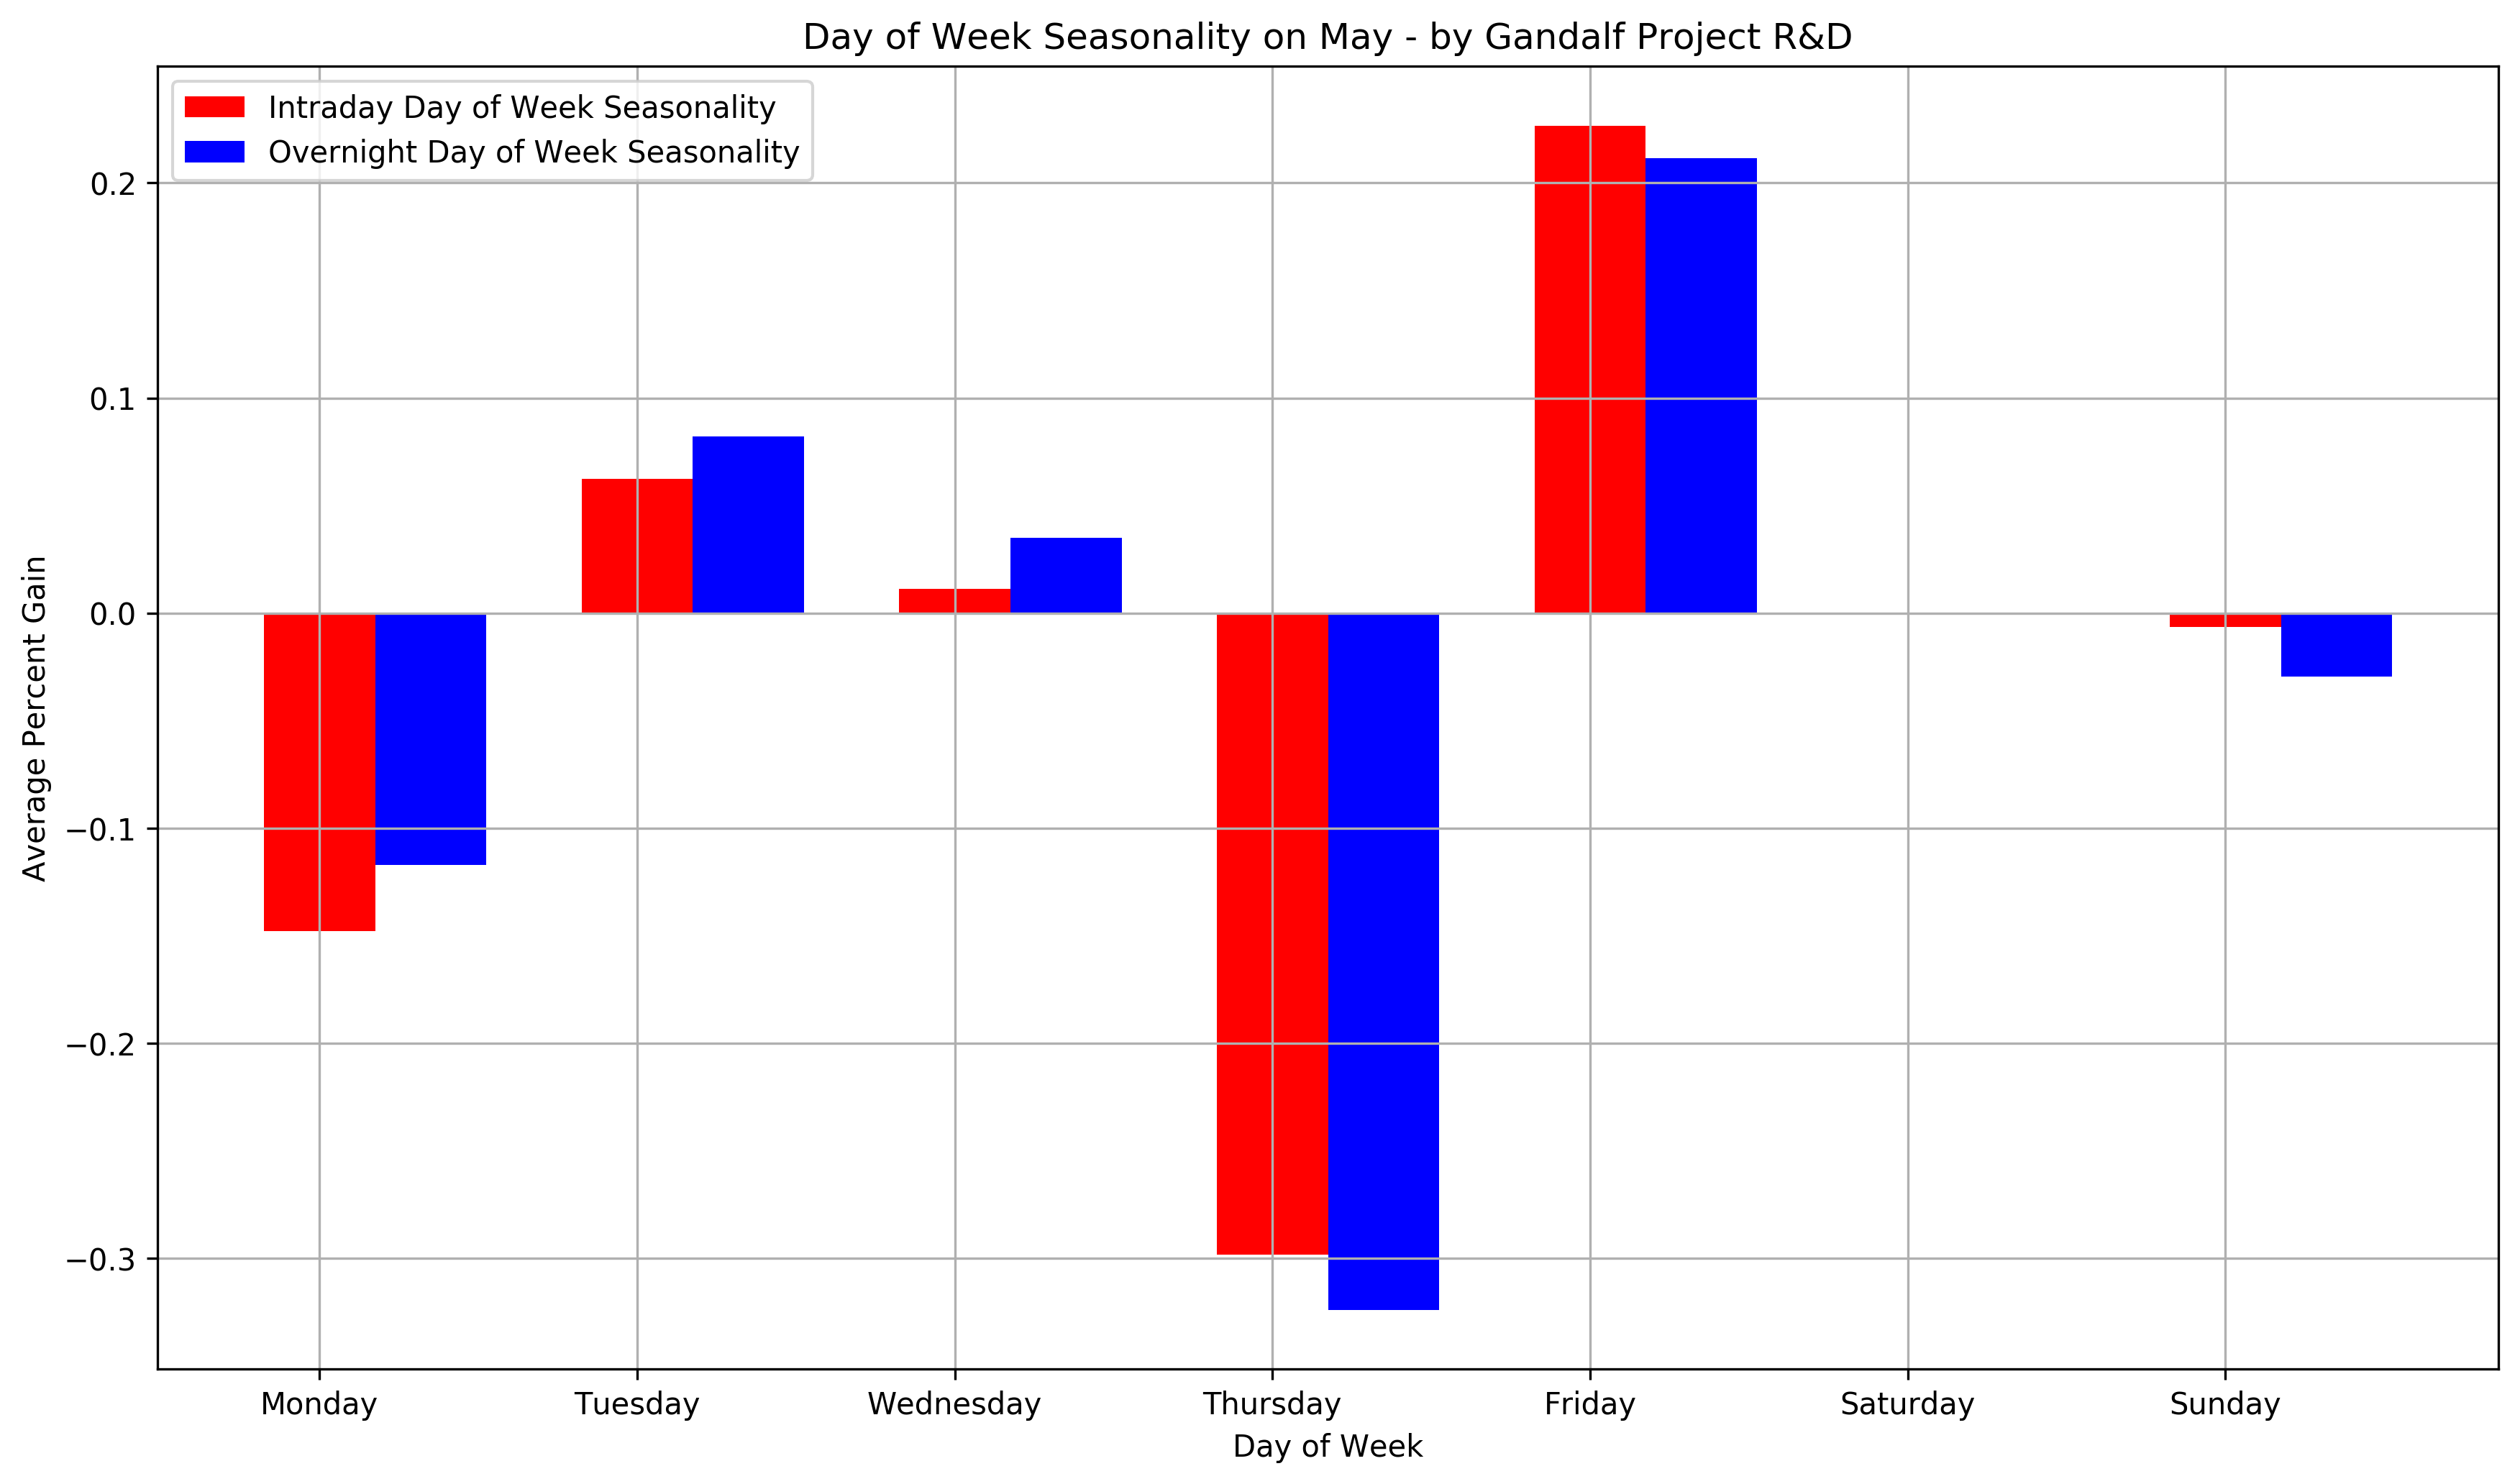

Statistics Intraday:
Monday -0.148 51.79 %
Tuesday 0.0622 51.72 %
Wednesday 0.0112 50.0 %
Thursday -0.2983 61.02 %
Friday 0.2267 53.45 %
Sunday -0.0064 46.43 %

Statistics Overnight:
Monday -0.1171 48.21 %
Tuesday 0.0821 53.45 %
Wednesday 0.035 46.55 %
Thursday -0.3241 61.02 %
Friday 0.2114 53.45 %
Sunday -0.0296 53.57 %



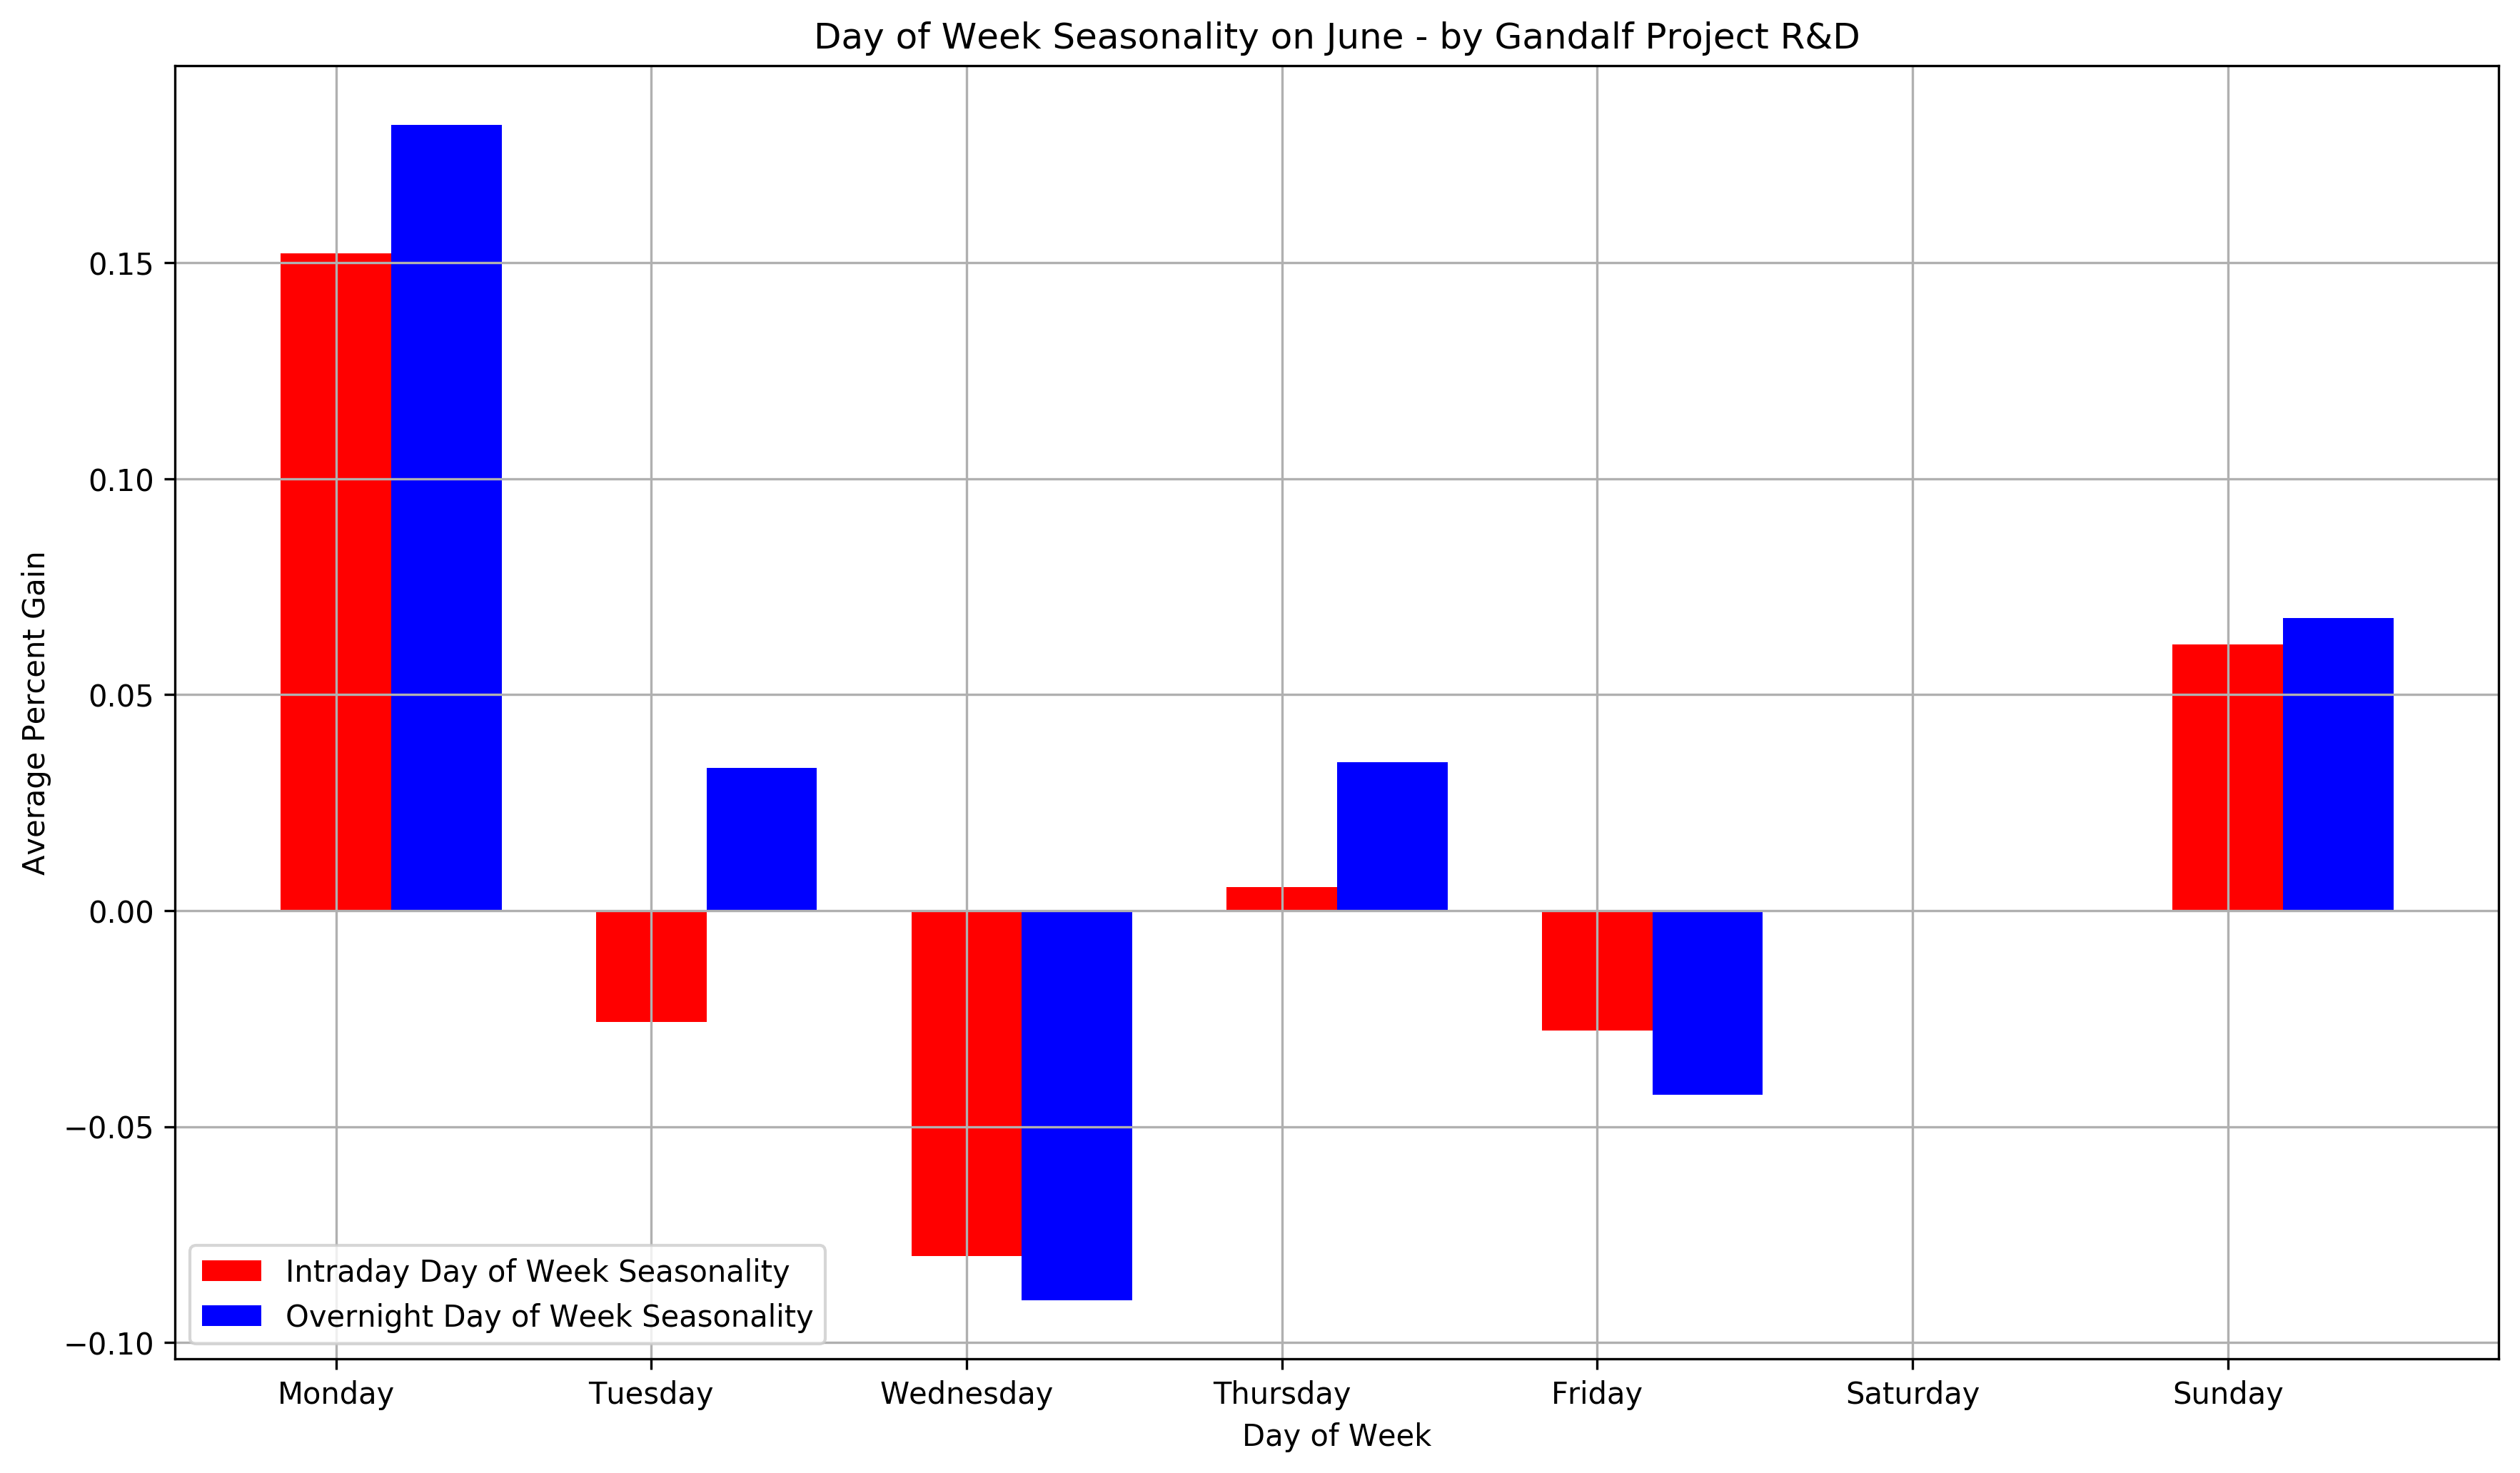

Statistics Intraday:
Monday 0.1522 52.73 %
Tuesday -0.0258 54.55 %
Wednesday -0.08 56.36 %
Thursday 0.0055 52.73 %
Friday -0.0277 57.14 %
Sunday 0.0616 54.55 %

Statistics Overnight:
Monday 0.182 52.73 %
Tuesday 0.0331 49.09 %
Wednesday -0.0902 50.91 %
Thursday 0.0344 50.91 %
Friday -0.0427 57.14 %
Sunday 0.0678 52.73 %



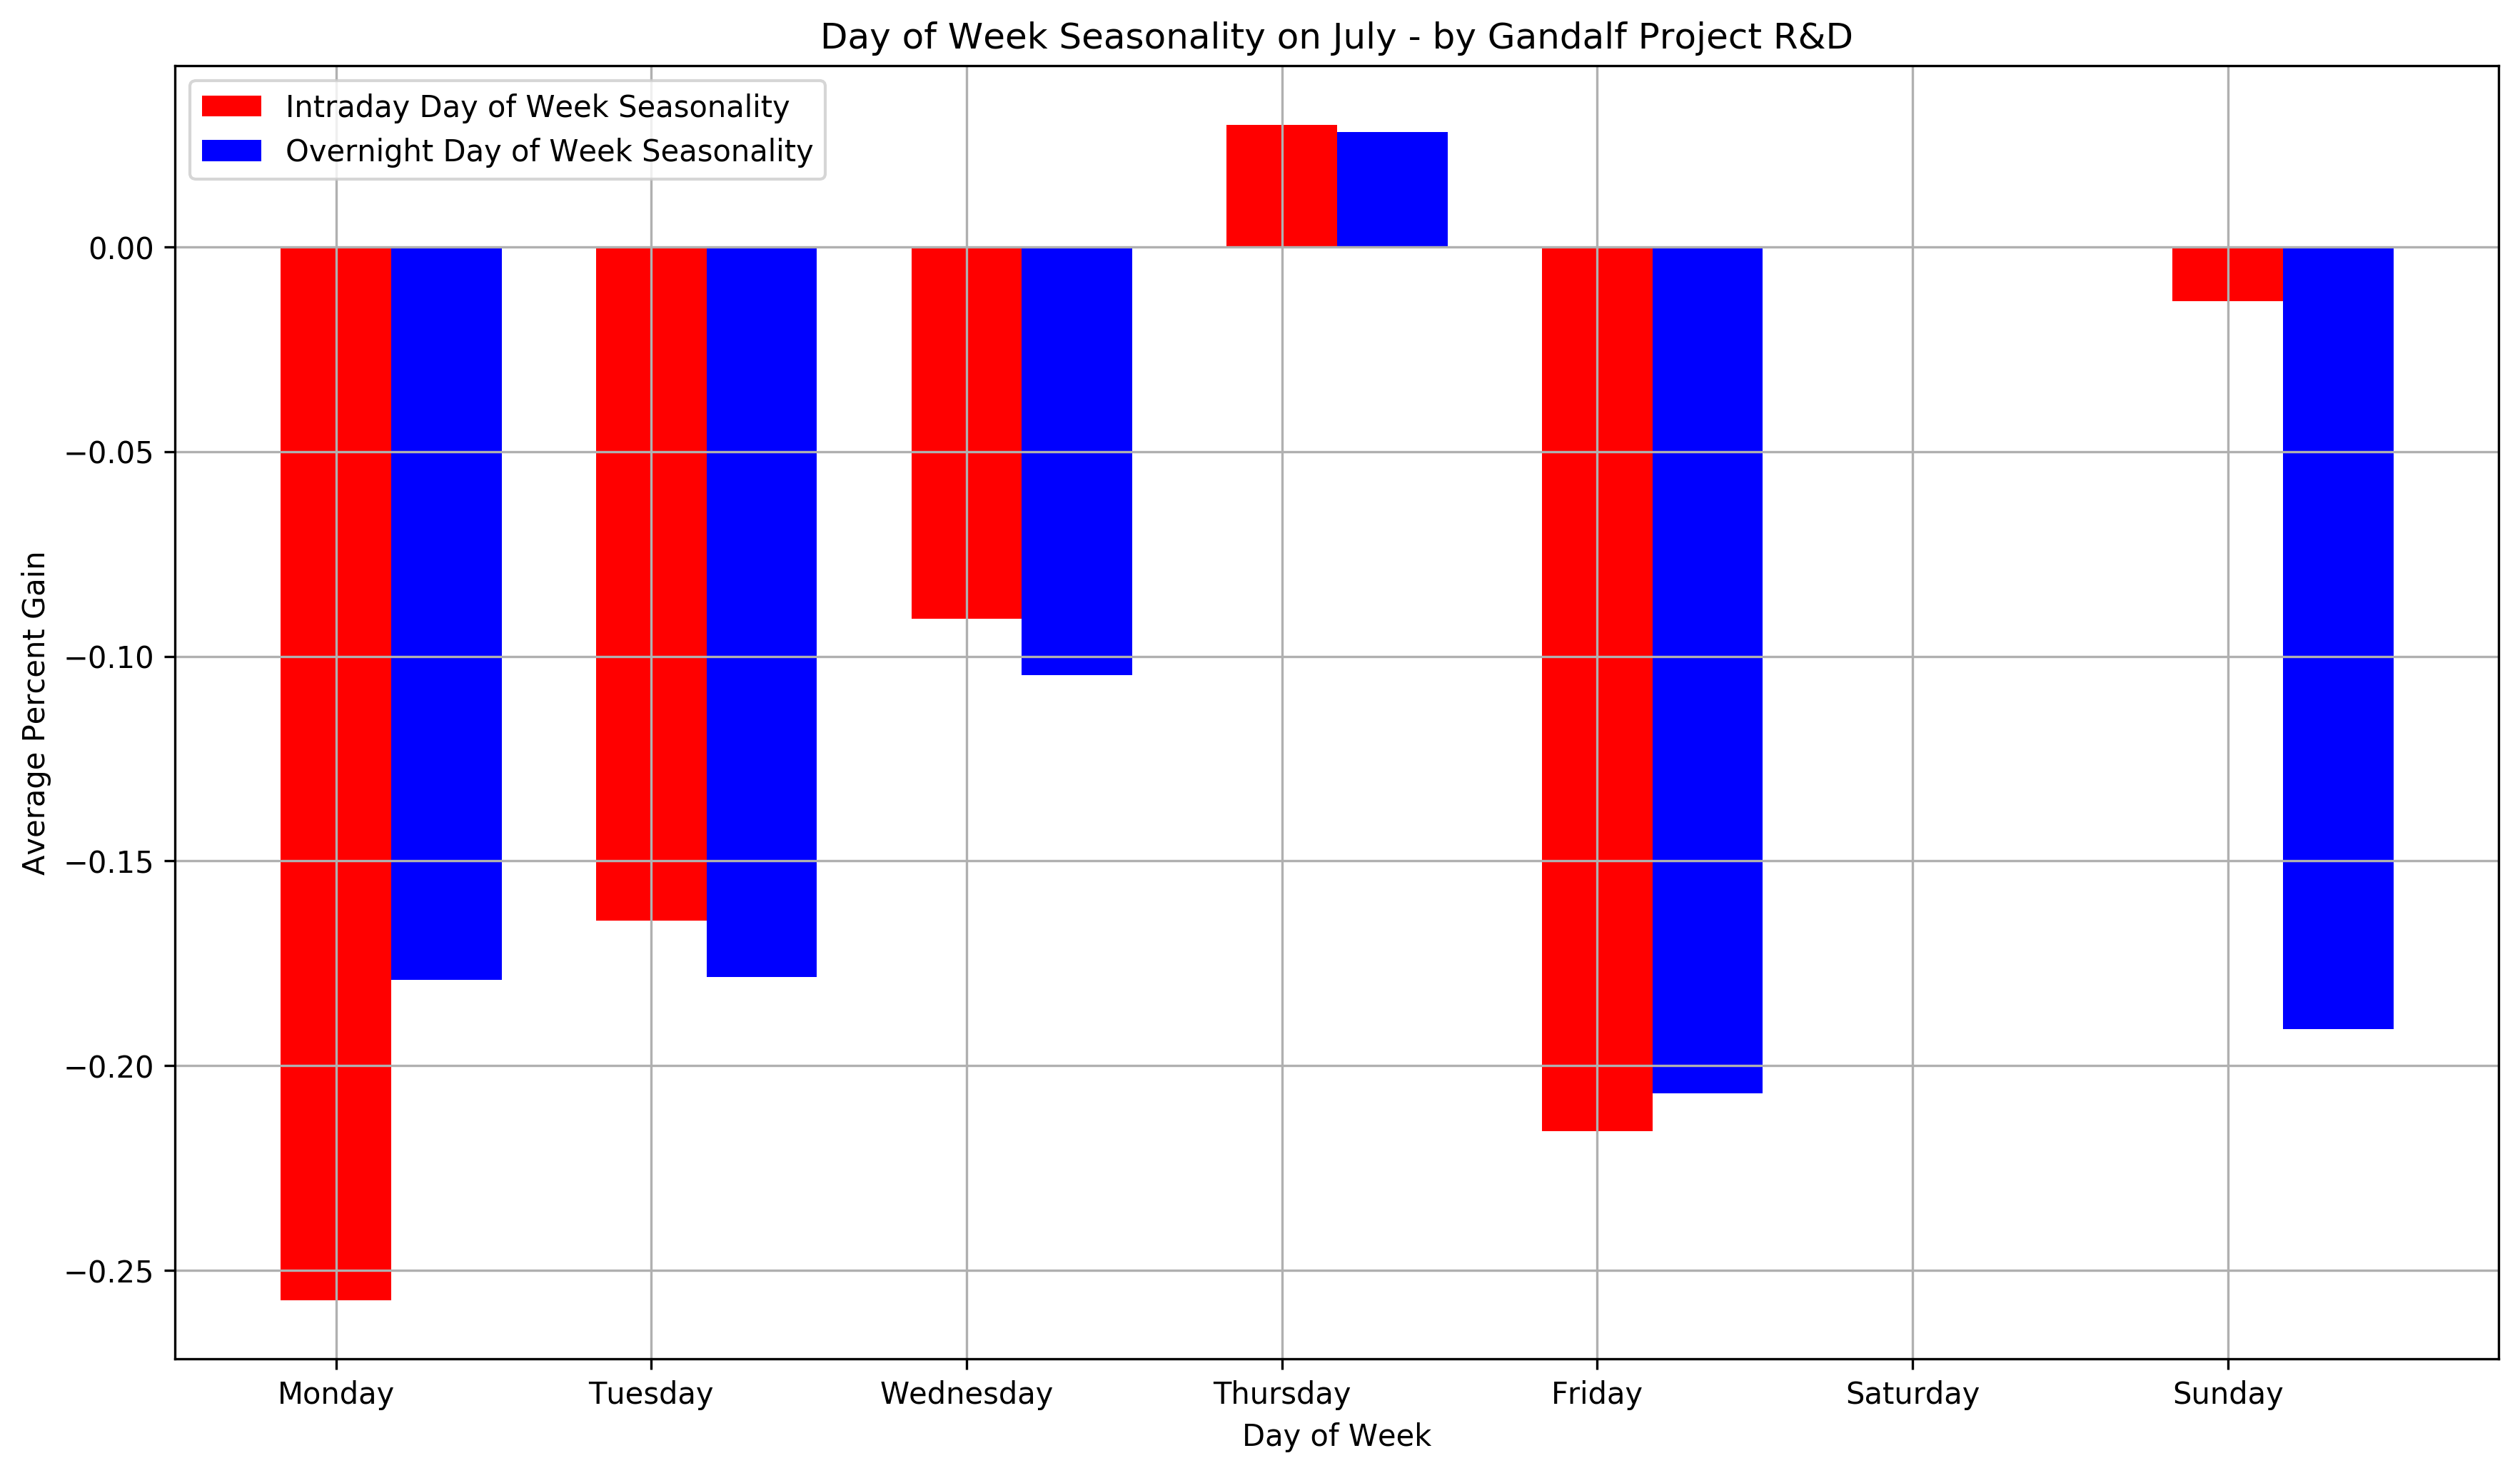

Statistics Intraday:
Monday -0.2572 62.07 %
Tuesday -0.1646 54.24 %
Wednesday -0.0909 58.62 %
Thursday 0.0298 50.88 %
Friday -0.216 54.39 %
Sunday -0.0133 52.63 %

Statistics Overnight:
Monday -0.179 53.45 %
Tuesday -0.1783 54.24 %
Wednesday -0.1047 56.9 %
Thursday 0.0281 50.88 %
Friday -0.2067 54.39 %
Sunday -0.1911 59.65 %



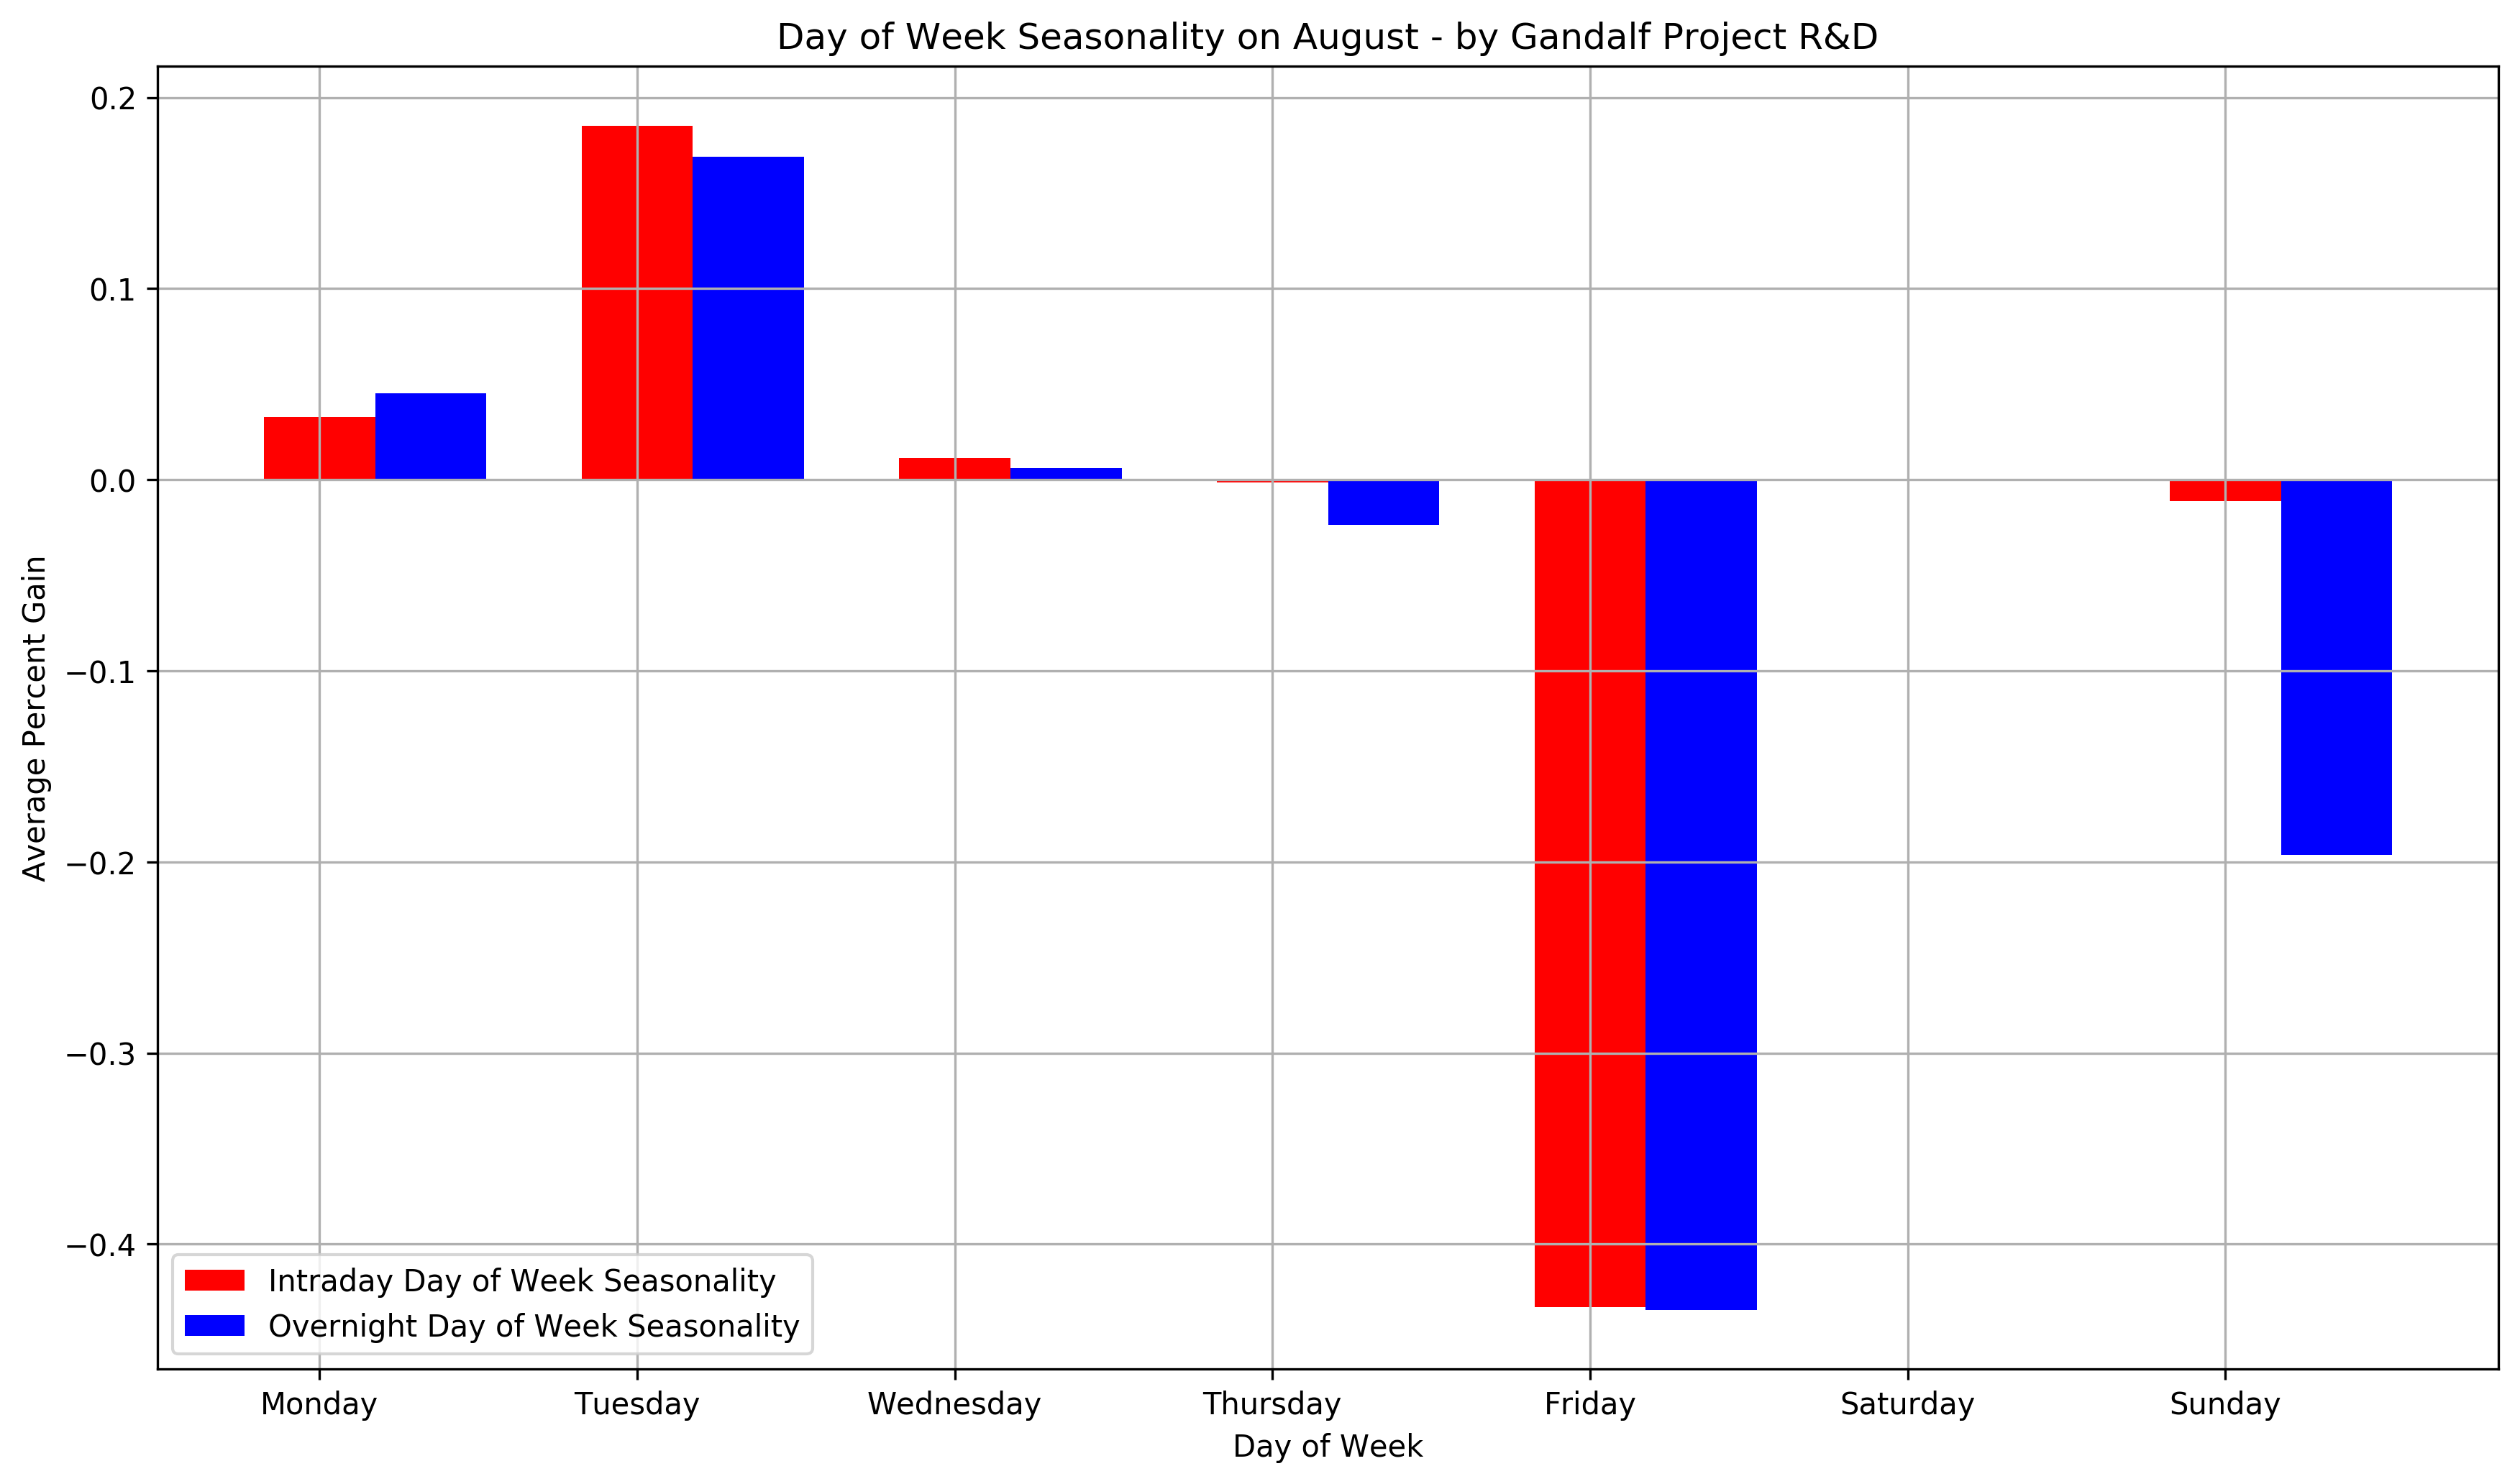

Statistics Intraday:
Monday 0.0326 56.14 %
Tuesday 0.1854 50.0 %
Wednesday 0.0112 51.72 %
Thursday -0.0016 46.55 %
Friday -0.4331 66.1 %
Sunday -0.0112 50.88 %

Statistics Overnight:
Monday 0.0451 63.16 %
Tuesday 0.1689 51.79 %
Wednesday 0.0062 50.0 %
Thursday -0.0236 46.55 %
Friday -0.4344 64.41 %
Sunday -0.1965 59.65 %



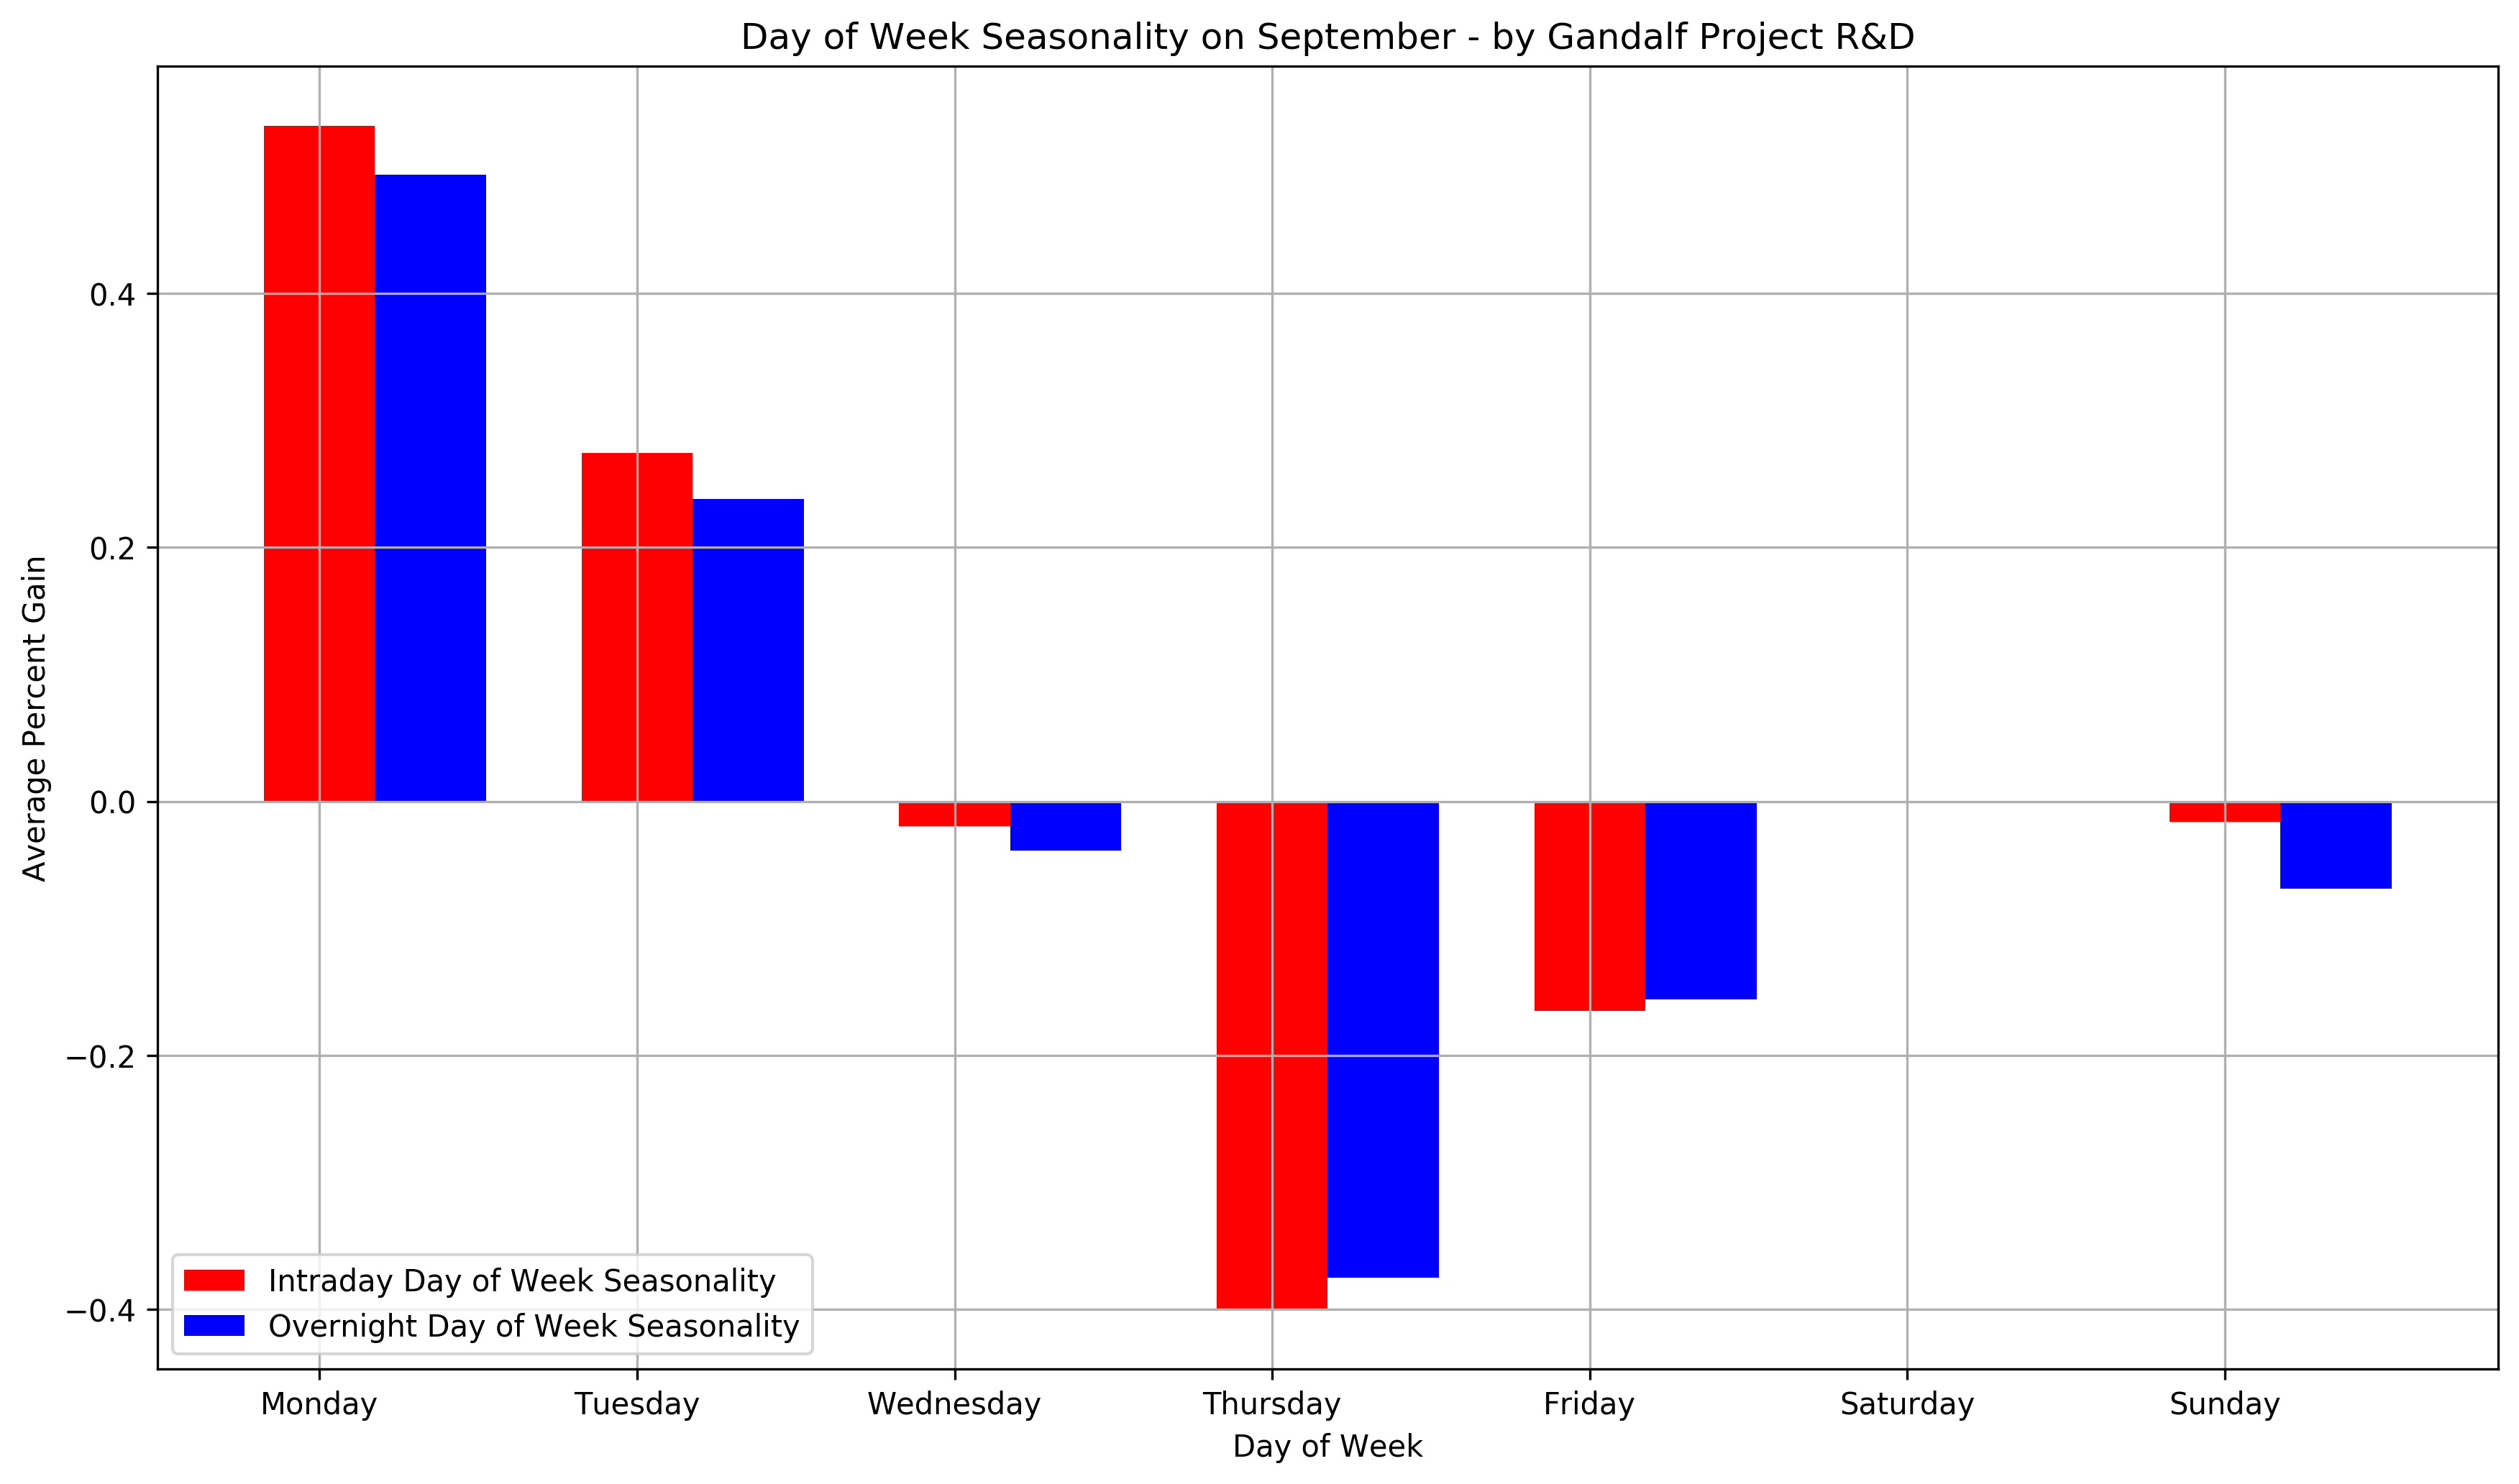

Statistics Intraday:
Monday 0.5321 55.36 %
Tuesday 0.2743 57.14 %
Wednesday -0.0193 58.18 %
Thursday -0.4004 61.82 %
Friday -0.1649 61.82 %
Sunday -0.0159 53.57 %

Statistics Overnight:
Monday 0.4934 57.14 %
Tuesday 0.2382 55.36 %
Wednesday -0.0387 60.0 %
Thursday -0.3753 61.82 %
Friday -0.1562 60.0 %
Sunday -0.0686 64.29 %



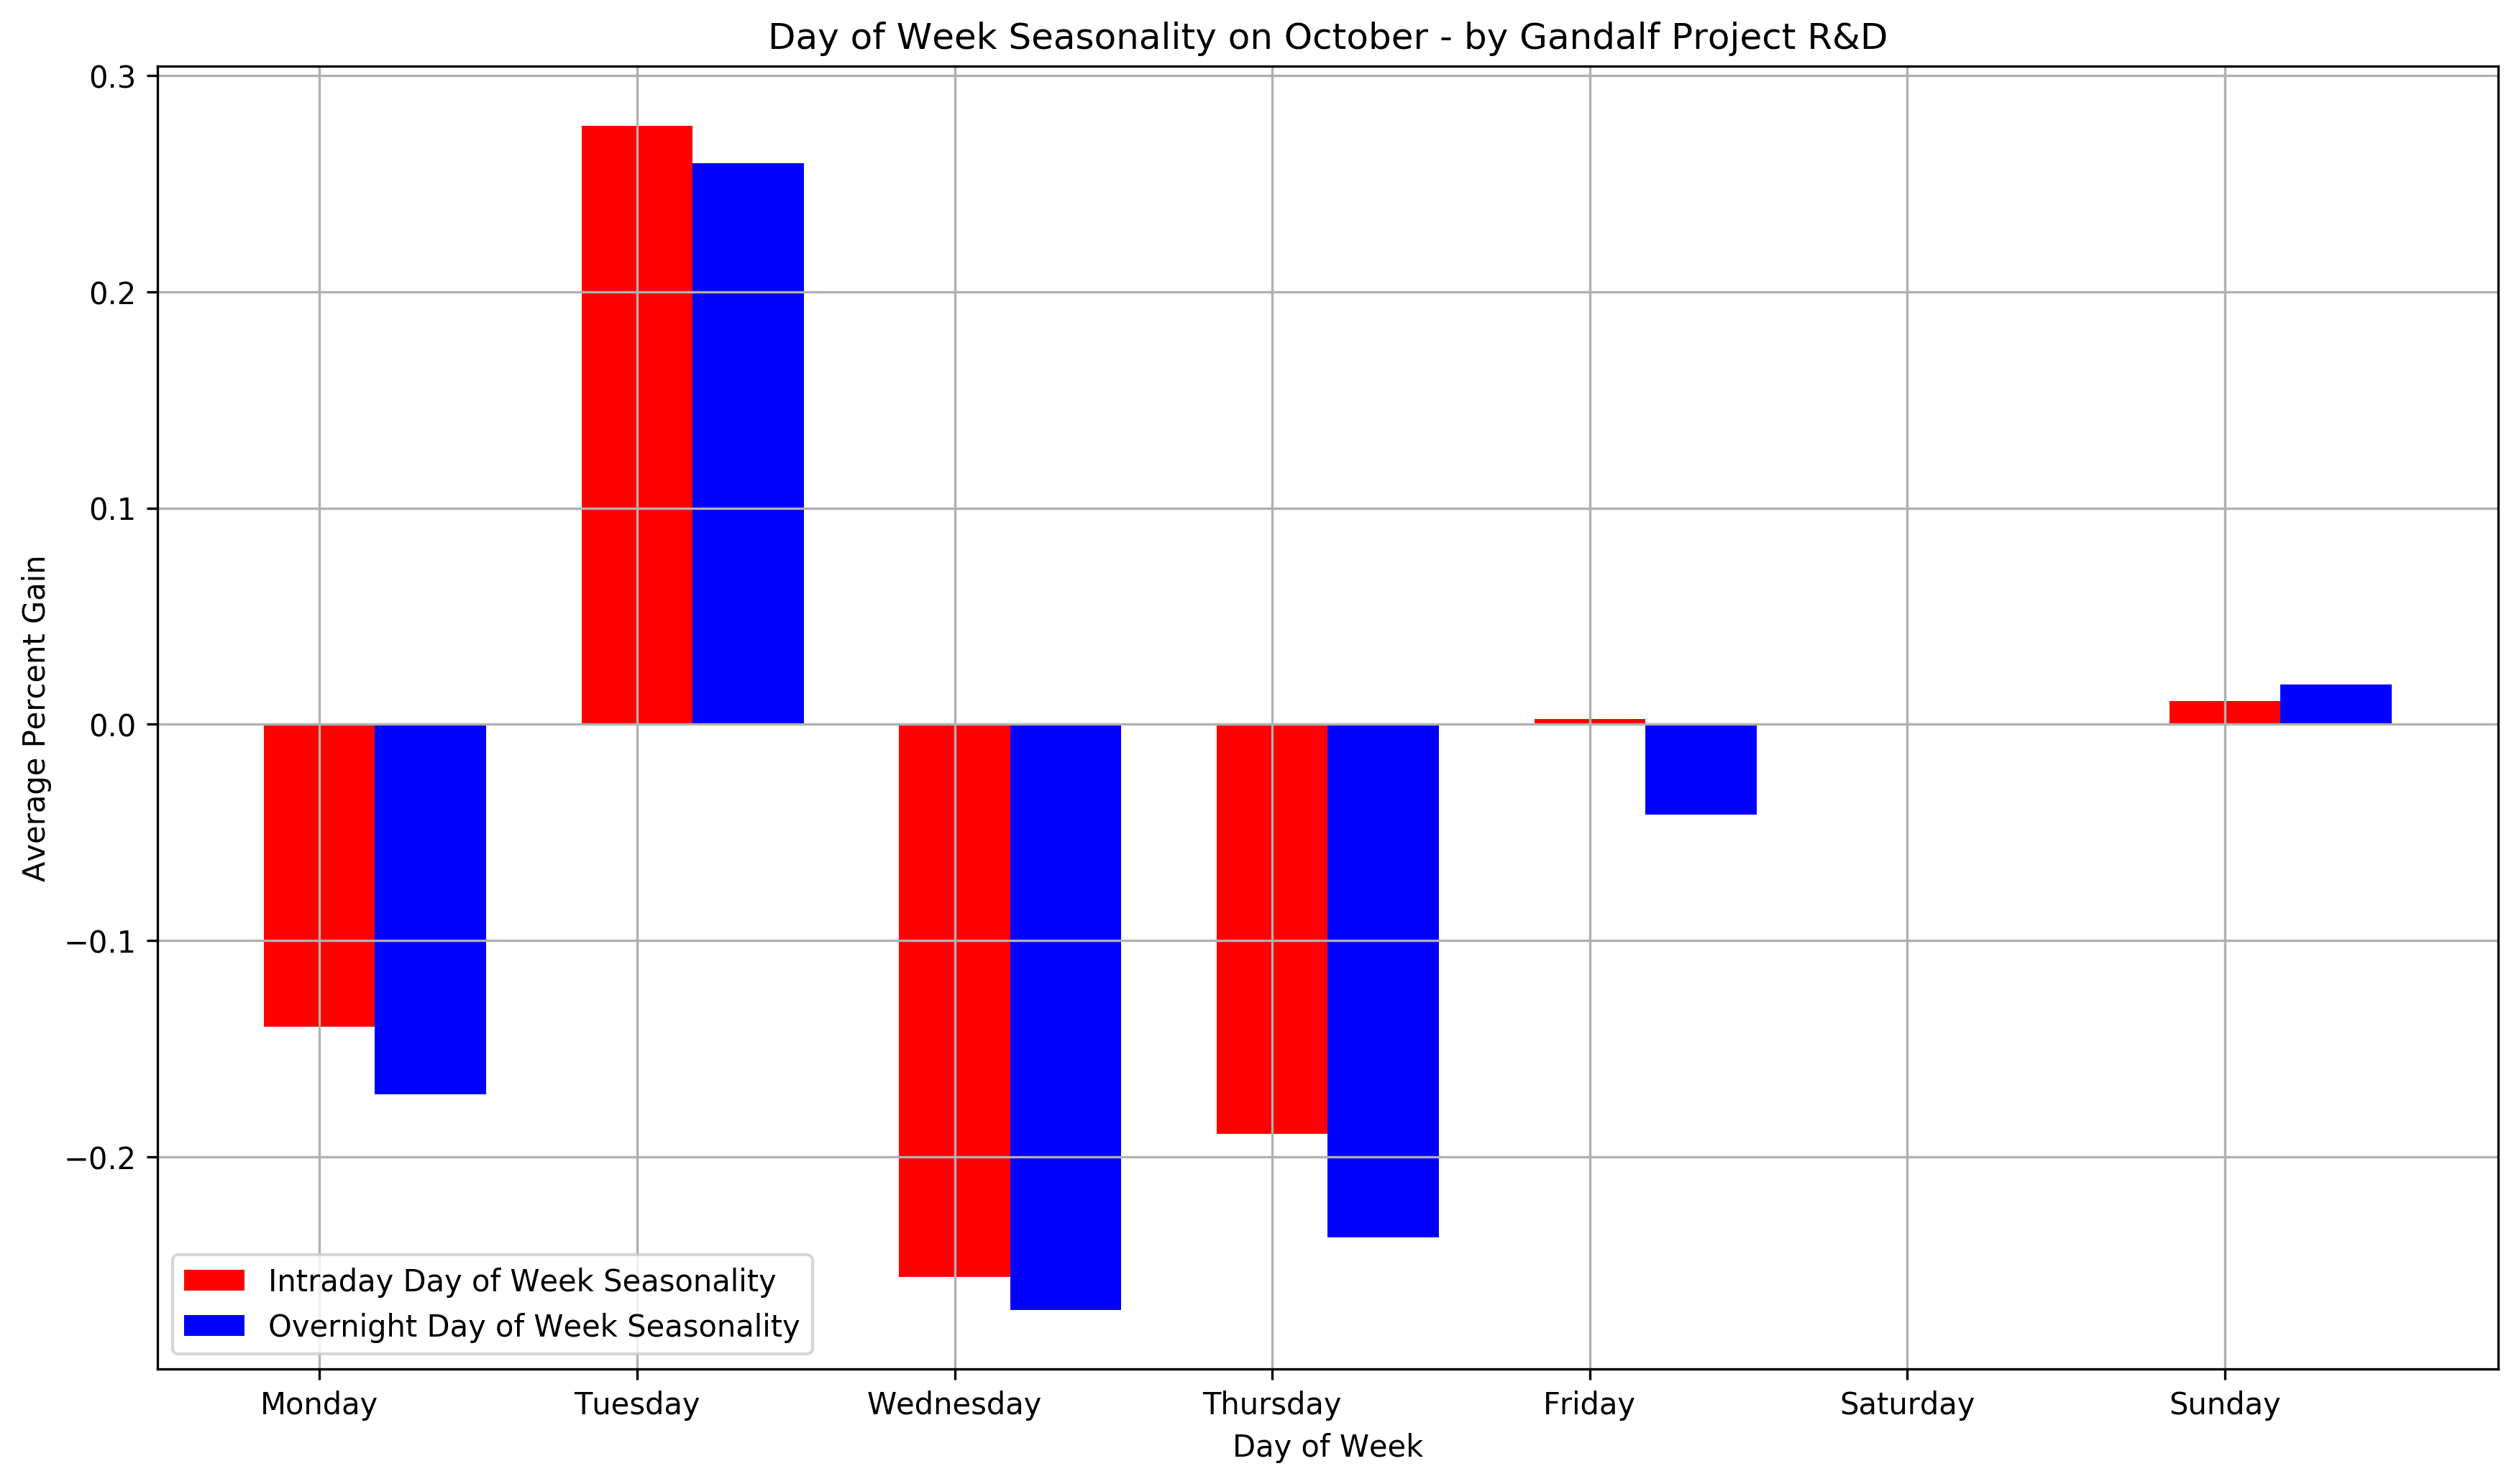

Statistics Intraday:
Monday -0.1398 55.17 %
Tuesday 0.2769 56.9 %
Wednesday -0.2556 57.63 %
Thursday -0.1893 53.45 %
Friday 0.0025 50.88 %
Sunday 0.0109 51.79 %

Statistics Overnight:
Monday -0.1712 50.0 %
Tuesday 0.2595 58.62 %
Wednesday -0.2708 55.93 %
Thursday -0.2374 55.17 %
Friday -0.0418 49.12 %
Sunday 0.0184 46.43 %



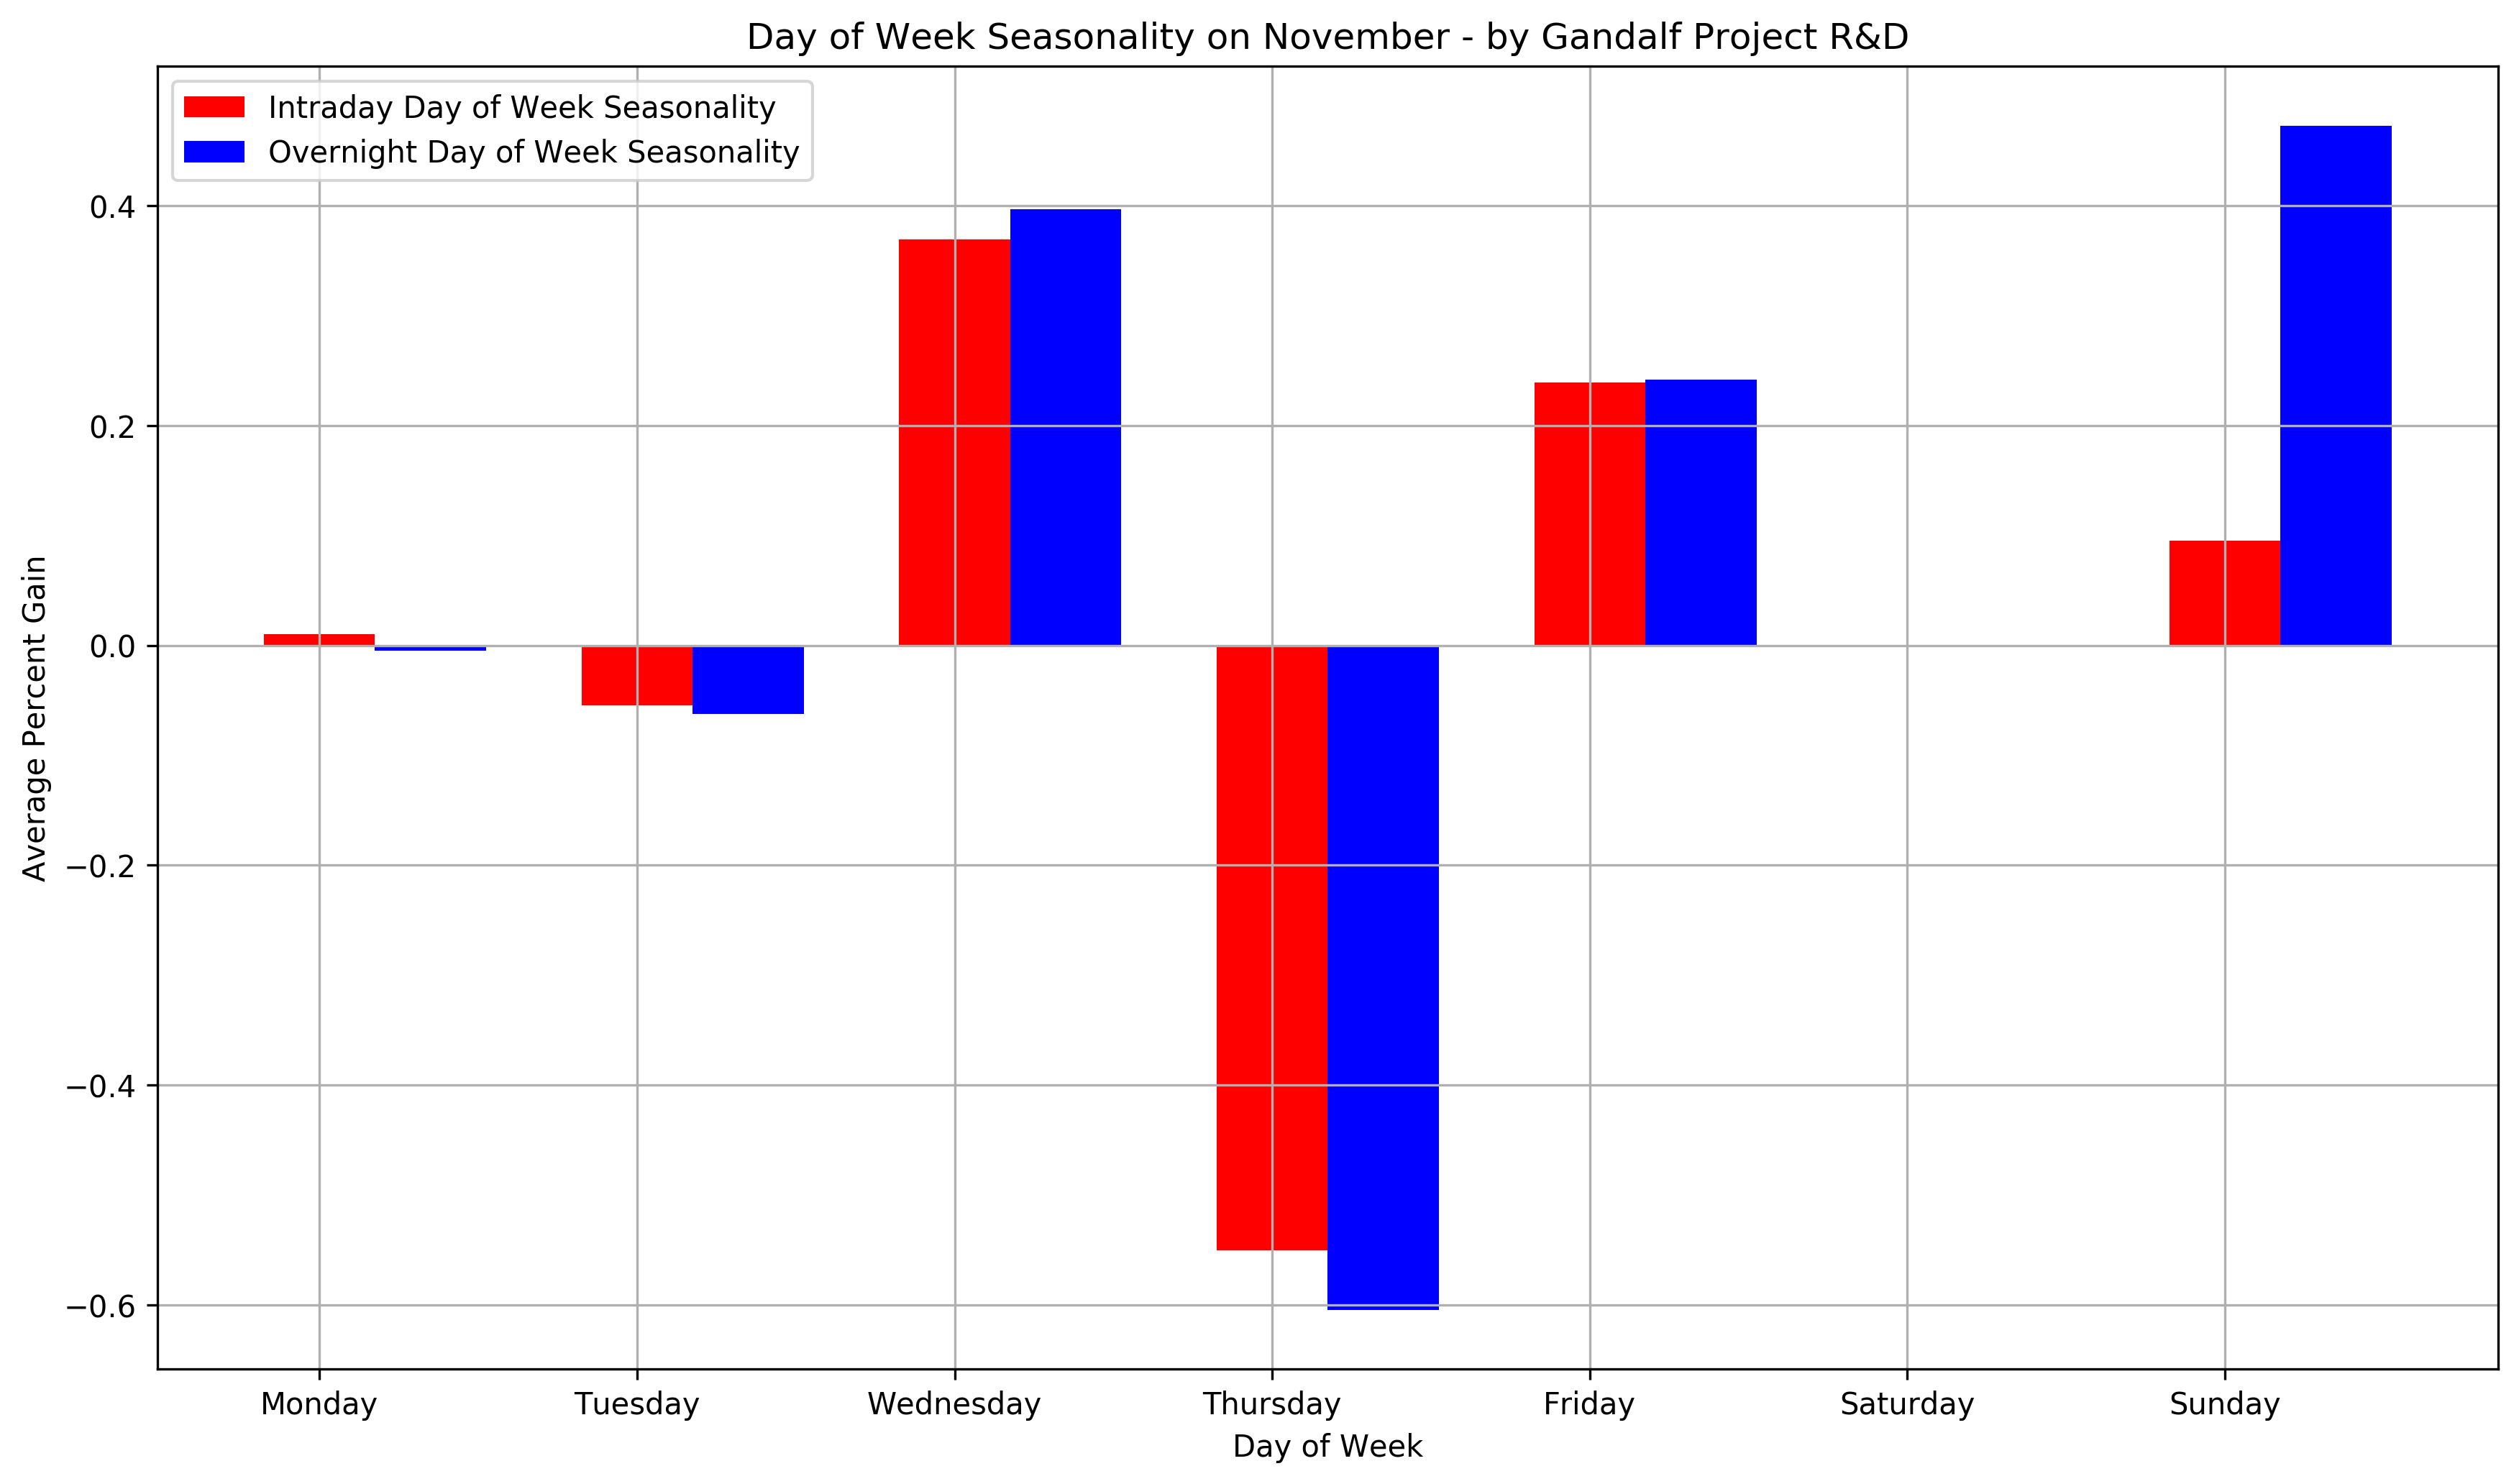

Statistics Intraday:
Monday 0.0104 52.83 %
Tuesday -0.0542 46.15 %
Wednesday 0.3692 46.15 %
Thursday -0.5502 50.94 %
Friday 0.2394 54.72 %
Sunday 0.095 61.11 %

Statistics Overnight:
Monday -0.0047 47.17 %
Tuesday -0.0623 48.08 %
Wednesday 0.3969 48.08 %
Thursday -0.6045 52.83 %
Friday 0.2419 54.72 %
Sunday 0.473 62.96 %



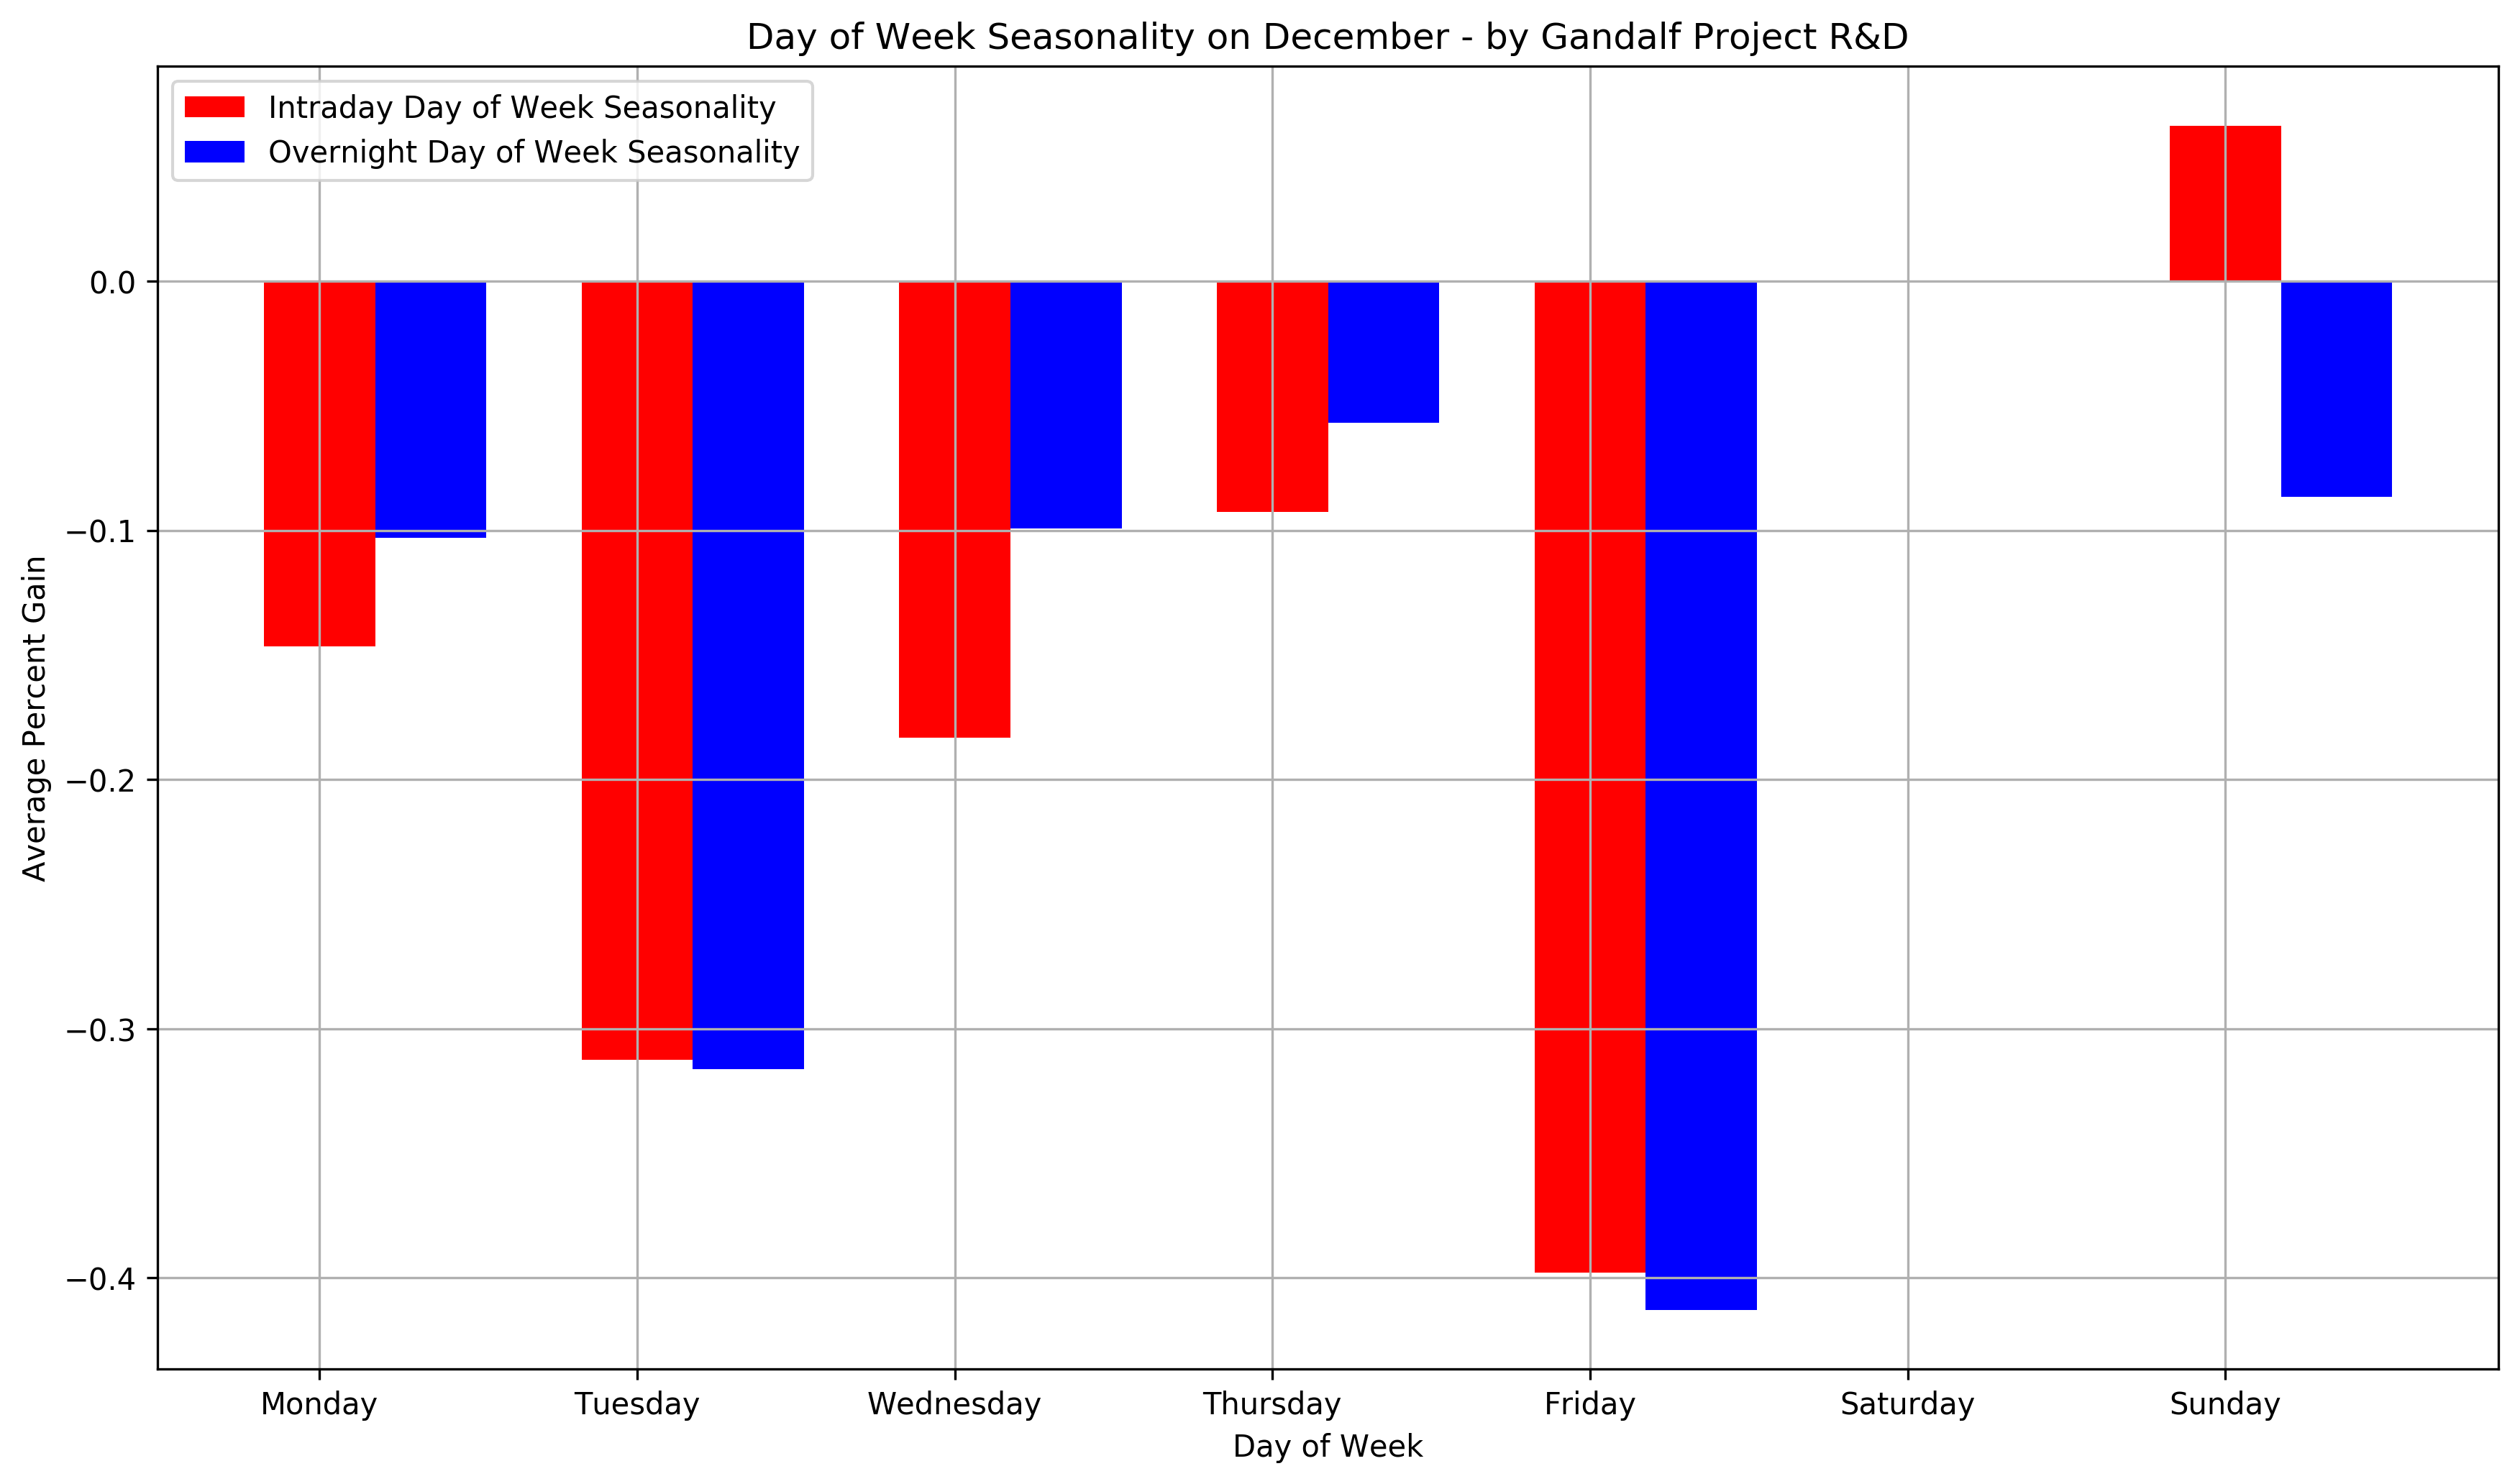

Statistics Intraday:
Monday -0.1467 44.44 %
Tuesday -0.3126 54.72 %
Wednesday -0.1832 54.72 %
Thursday -0.0926 60.38 %
Friday -0.398 61.22 %
Sunday 0.0624 51.02 %

Statistics Overnight:
Monday -0.1031 44.44 %
Tuesday -0.3162 56.6 %
Wednesday -0.0992 52.83 %
Thursday -0.0568 60.38 %
Friday -0.4129 65.31 %
Sunday -0.0865 51.02 %


In [16]:
for mkey, mvalue in months.items():
    biasWeeklyIntraday = []
    biasWeeklyOverNight = []
    DayOfWeek_Intraday_Statistics = []
    DayOfWeek_OverNight_Statistics = []
    
    for dkey, dvalue in dow.items():
        biasWeeklyIntraday.append(daily[(daily['DOW'] == dvalue) & 
                                        (daily['Month'] == mvalue)]['DailyCloseOpenPerc'].mean())
        biasWeeklyOverNight.append(daily[(daily['DOW'] == dvalue) & 
                                         (daily['Month']== mvalue)]['DailyDeltaClosePerc'].mean())
        
        intraday = daily[(daily['DOW'] == dvalue) & (daily['Month'] == mvalue)]['DailyCloseOpenPerc'].dropna()
        DayOfWeek_Intraday_Statistics.append(percPosNeg(intraday, 0))
        
        overnight = daily[(daily['DOW'] == dvalue) & (daily['Month'] == mvalue)]['DailyDeltaClosePerc'].dropna()
        DayOfWeek_OverNight_Statistics.append(percPosNeg(overnight, 0))

    print("")
    month_plot(biasWeeklyIntraday,biasWeeklyOverNight,mkey)
    
    print("Statistics Intraday:")
    for el in range(len(DayOfWeek_Intraday_Statistics)):
        if biasWeeklyIntraday[el] > 0:
            print(daysofweek_names[el], round(biasWeeklyIntraday[el], 4), 
                  DayOfWeek_Intraday_Statistics[el][0], "%")
        if biasWeeklyIntraday[el] <= 0:
            print(daysofweek_names[el], round(biasWeeklyIntraday[el], 4), 
                  DayOfWeek_Intraday_Statistics[el][1], "%")

    print("")
    print("Statistics Overnight:")
    for el in range(len(DayOfWeek_OverNight_Statistics)):
        if biasWeeklyOverNight[el] > 0:
            print(daysofweek_names[el], round(biasWeeklyOverNight[el], 4), 
                  DayOfWeek_OverNight_Statistics[el][0], "%")
        if biasWeeklyOverNight[el] <= 0:
            print(daysofweek_names[el], round(biasWeeklyOverNight[el], 4), 
                  DayOfWeek_OverNight_Statistics[el][1], "%")